# Assessing Lake Titicaca’s water levels in support of water management

Production date: 08-09-2025

Produced by: Amaya Camila Trigoso Barrientos (VUB)

## 🌍 Use case: Utilizing satellite altimetry to support integrated water resources management in the Titicaca–Desaguadero–Poopó–Salar de Coipasa (TDPS) System

## ❓ Quality assessment question(s)
* **Is the temporal completeness of the satellite-derived lake water level dataset for Lake Titicaca sufficient to support water resources management in the Titicaca–Desaguadero–Poopó–Salar de Coipasa (TDPS) System?**

The [lake water levels from 1992 to present derived from satellite observations](https://cds.climate.copernicus.eu/datasets/satellite-lake-water-level?tab=overview) (C3S-LWL v5.0) dataset provides long-term water level observations for numerous lakes worldwide. The Climate Data Record (CDR) of the C3S-LWL v5.0 dataset is updated annually. The dataset provides at least 10 years of temporal coverage. However, the specific temporal coverage and average time step vary by lake (time steps are irregular). The dataset provides one value of water level per time step.

This dataset can be useful for Integrated Water Resources Management (IWRM) applications such as understanding lake responses to seasonal dynamics, climate variability, and long-term climate change-factors which directly influence water availability for ecosystems and dependent human populations. To illustrate the potential applicability of the dataset, Lake Titicaca was selected as a case study. The lake forms part of the Titicaca–Desaguadero–Poopó–Salar de Coipasa (TDPS) hydrological system, which spans Peru and Bolivia. This system provides critical freshwater resources to millions of people, supporting agriculture, domestic use, and ecosystem services across the Altiplano. Lake Titicaca feeds the Desaguadero River, which flows into Lake Poopó. This hydrological system is complex and subject to multiple drivers (e.g., climate variability, land use change, population growth), which exert pressures on water availability and quality. These pressures affect the state of the system, such as lake levels, which in turn have impacts on ecosystems and human livelihoods [[1]](https://doi.org/10.3390/w8040144) [[2]](https://doi.org/10.1016/j.ejrh.2021.100927).

The objective of this assessment is to examine the temporal completeness of Lake Titicaca's water level data in the C3S-LWL v5.0 dataset and assess its ability to support Integrated Water Resources Management (IWRM) in the context of the TDPS system.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* The temporal completeness of the C3S–LWL v5.0 dataset improves significantly after 2016, following the deployment of Sentinel-3A and Jason-3, and is further enhanced by the launches of Sentinel-3B (2018) and Sentinel-6A (2020).

* The C3S-LWL dataset captures the seasonality of Lake Titicaca effectively, except in years with extended gaps in observations, such as 2012. If many months in a year have no data in the C3S-LWL dataset the results are visibly different to those of in-situ data.

* The C3S–LWL timeseries captures the major flooding events of 2003 and 2004 in Lake Titicaca, demonstrating its ability to represent cumulative seasonal peaks. However, its limited temporal resolution (specially before 2019) makes it unsuitable for detecting short-lived flash floods caused by isolated extreme precipitation events. 

* The cumulative impact of major droughts, such as the 2023 event, on Lake Titicaca’s water level is evident in the C3S–LWL timeseries.

* The current temporal span and gaps in the dataset limit its ability to reliably detect and analyse ENSO-related effects on Titicaca lake's water levels.

```

## 📋 Methodology

C3S-LWL data for Lake Titicaca were downloaded and evaluated for temporal coverage, including median and maximum time steps and the occurrence of data gaps. Next, water level time series were plotted to examine seasonality and historically known extreme events, with visual comparisons made to in-situ observations from the Bolivian National Meteorological and Hydrological Service (SENAMHI) . The relationship between ENSO phases and lake levels was also explored following established approaches. Finally, percentile ranks were calculated for key performance indicators to assess data completeness, and the suitability of the dataset for similar analyses in other lakes, supporting Integrated Water Resources Management, was evaluated.

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-1)**
 * Download all available C3S–LWL v5.0 satellite-lake-water-level data for Lake Titicaca.

**[](section-2)**
 * Calculate performance indicators related to temporal resolution: median timestep and max. timestep for different periods of time.
 * Plot the number of water level records per month across the dataset’s full temporal span.
 * Analyse the causes of data gaps and changes in data availability over time using information from the dataset’s Documentation.

**[](section-3)**
 * Plot the water level time series, highlighting points relevant for analysing seasonality as well as historically reported extreme events.
 * Compare CS3-LWL and SENAMHI data visually. 
 * Evaluate whether the dataset captures seasonality and extreme events.
 * Analyse the relationship between ENSO phases and Lake Titicaca’s water levels using an approach adapted from Gutierrez-Villarreal et al. (2024) [[3]](https://doi.org/10.1016/j.wace.2024.100710), and assess whether this relationship is evident in the C3S–LWL v5.0 dataset.

**[](section-4)**
 * Calculate the percentile ranks of Lake Titicaca across key performance indicators to assess its relative data completeness within the dataset.
 * Analysed the suitability of the dataset for applying similar assessments to other lakes in support of IWRM.
 

## 📈 Analysis and results

(section-1)=
### 1. Request and download data

#### Import packages

In [75]:
from tabulate import tabulate
import cartopy.crs as ccrs
import fsspec
import matplotlib.cbook
import pandas as pd
import requests
import xarray as xr
import warnings
import numpy as np
import matplotlib.pyplot as plt
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
import os
import seaborn as sns
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-notebook")

#### Set data request

In [2]:
collection_id = "satellite-lake-water-level"
request = {
    "variable": "all",
    "region": "southern_america",
    "lake": "titicaca",
}

#### Download data

In [3]:
da_all = download.download_and_transform(collection_id, request).compute()

100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


In [4]:
# Extract the DataArray for water_surface_height_above_reference_datum
da = da_all["water_surface_height_above_reference_datum"]

# Extract the DataArray for water_surface_height_uncertainty
da_u = da_all["water_surface_height_uncertainty"]

(section-2)=
### 2. Temporal completeness

#### Performance indicators

The Product Quality Assessment Report ([PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112)) for the dataset includes a table in Annex A presenting the performance indicators calculated for all lakes. These indicators are computed for the entire available period (1992–2023) and for the most recent 10-year period (2014–2023). The median and maximum timesteps are useful indicators for assessing temporal completeness. In this section, these indicators will be calculated for Lake Titicaca and compared with the information provided in the PQAR. The maximum timestep represents the largest gap between two observations, expressed as the maximum number of days without data.

In [5]:
# Calculate time differences
time_diff = da.time.diff(dim="time")  # Time differences remain in timedelta64[ns]
median_timestep = time_diff.median().dt.days.item()  # Convert to days
max_timestep = time_diff.max().dt.days.item()        # Convert to days
timeseries_duration = (da.time[-1] - da.time[0]).dt.days.item()  # Total duration in days

# Subset for 2014 to 2023
subset_da = da.sel(time=slice("2014-01-01", "2023-12-31"))
if subset_da.size > 0:  # Ensure subset is not empty
    subset_time_diff = subset_da.time.diff(dim="time")
    subset_median_timestep = subset_time_diff.median().dt.days.item()
    subset_max_timestep = subset_time_diff.max().dt.days.item()
    subset_timeseries_duration = (subset_da.time[-1] - subset_da.time[0]).dt.days.item()
else:
    subset_median_timestep = None
    subset_max_timestep = None
    subset_timeseries_duration = None

# Print results
print("All Data:")
print(f"Median Timestep (days): {median_timestep}")
print(f"Max Timestep (days): {max_timestep}")
print(f"Timeseries Duration (years): {timeseries_duration/365}")

print("\nSubset 2014-2023:")
print(f"Median Timestep (days): {subset_median_timestep}")
print(f"Max Timestep (days): {subset_max_timestep}")

All Data:
Median Timestep (days): 28
Max Timestep (days): 142
Timeseries Duration (years): 28.5972602739726

Subset 2014-2023:
Median Timestep (days): 14
Max Timestep (days): 93


The integer part of the results are the same as the ones presented in the PQAR. 

#### Records per month

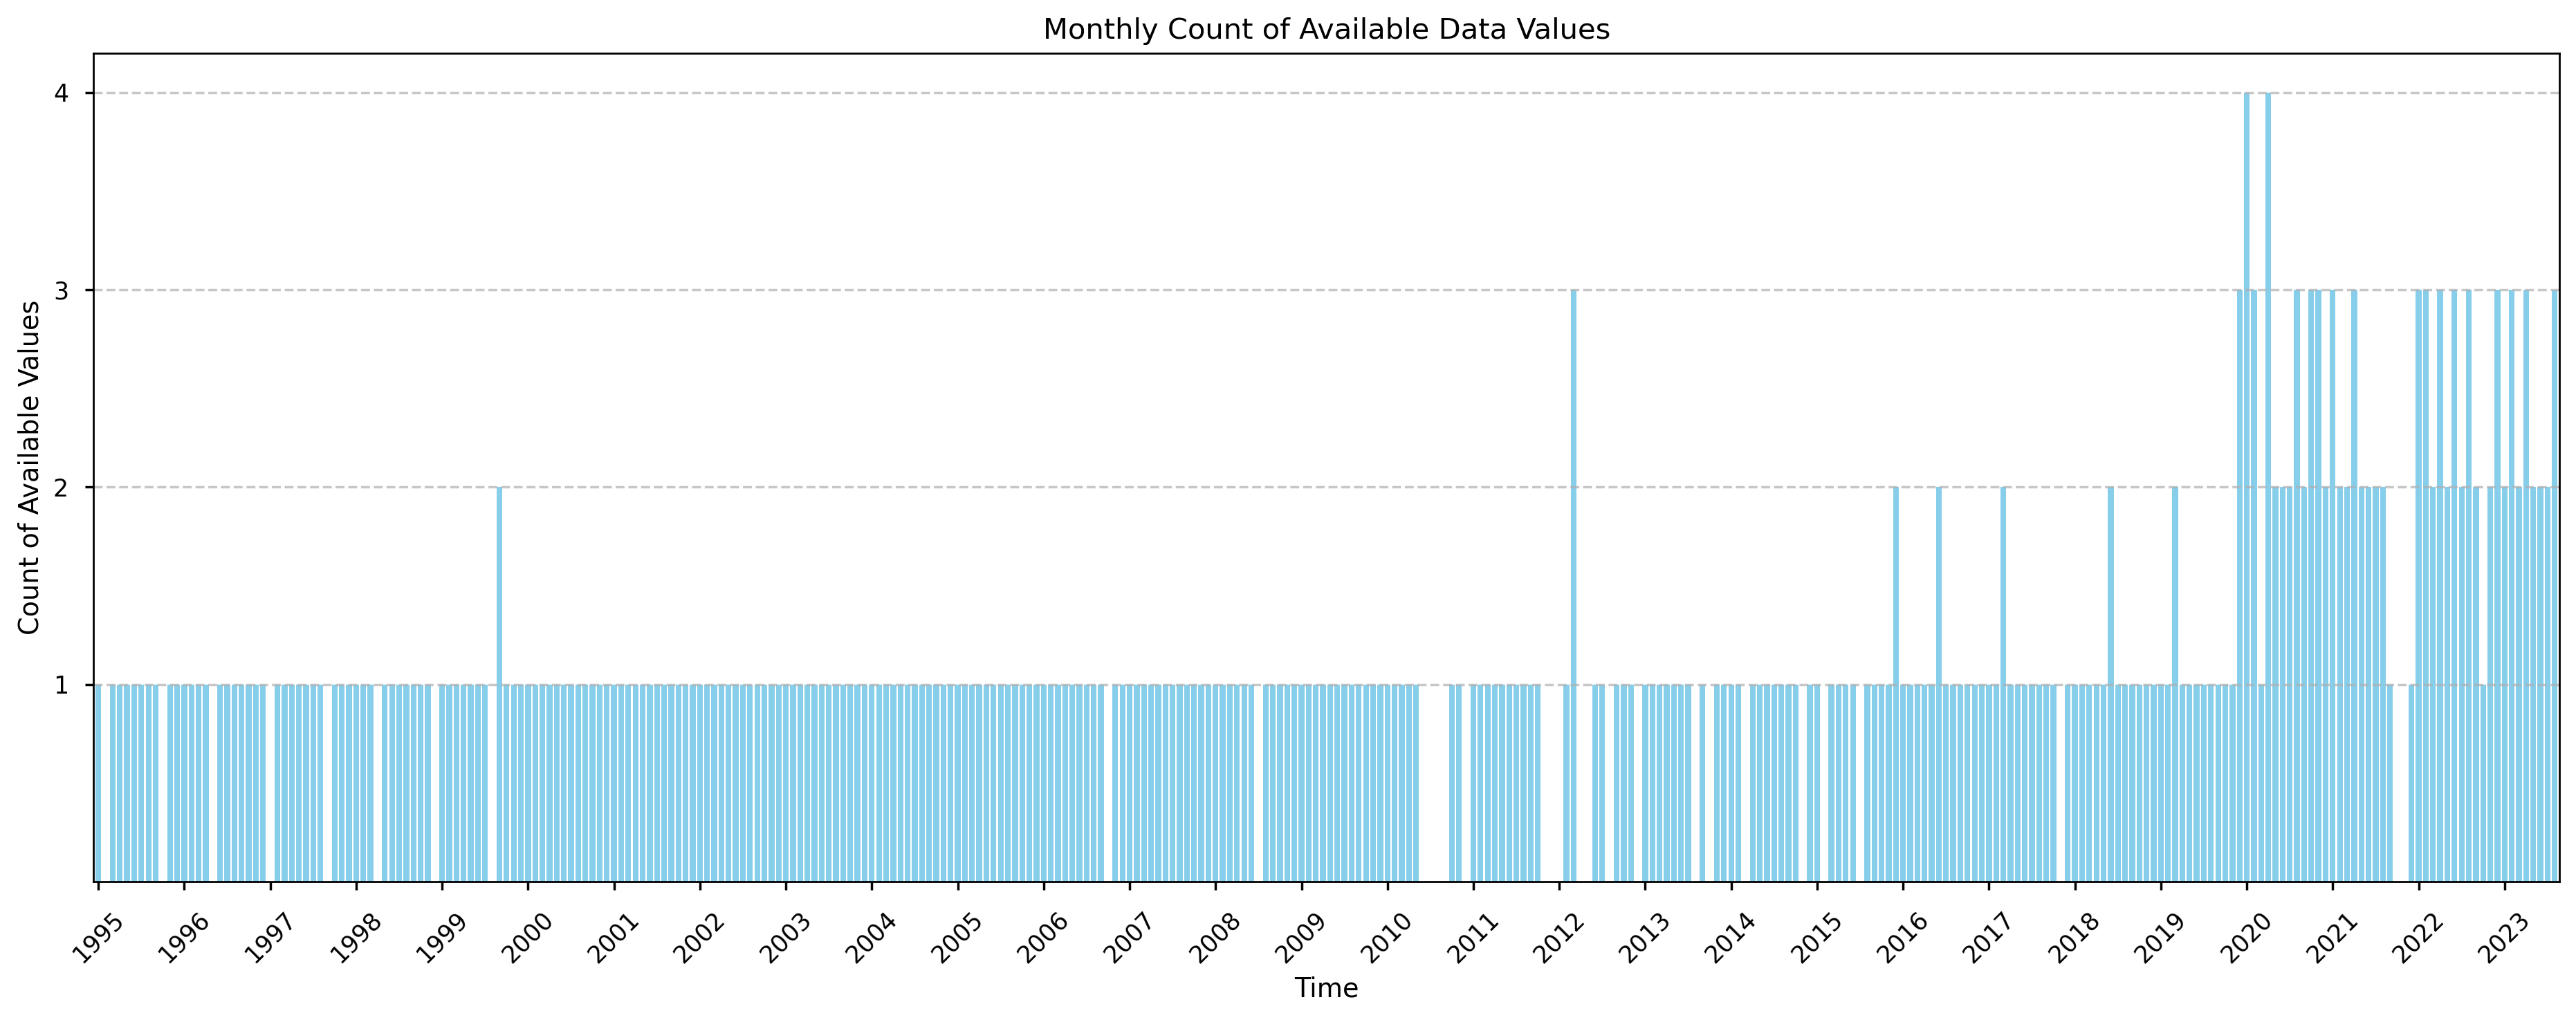

In [6]:
# Resample to monthly frequency and count non-NaN values
monthly_counts = da.resample(time="M").count()

# Convert to Pandas for easier plotting
monthly_counts_pd = monthly_counts.to_pandas()

# Plot as bars
plt.figure(figsize=(15, 6), dpi=250)
monthly_counts_pd.plot(kind='bar', color='skyblue', width=0.8)
plt.title("Monthly Count of Available Data Values")
plt.xlabel("Time")
plt.ylabel("Count of Available Values")

# Customize the x-axis labels to show only years
xticks_positions = range(0, len(monthly_counts_pd), 12)  # Tick at the start of each year
xticks_labels = monthly_counts_pd.index[::12].strftime('%Y')  # Format as year

plt.xticks(ticks=xticks_positions, labels=xticks_labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

*Figure 1. Count of values available in the CDS water level dataset per month over time.*

A clear increase in the number of measurements per month can be observed from 2020 onwards. Therefore, the median and maximum timestep indicators were calculated again for two periods: 1995-2019 and 2020-2023.

In [7]:
# Calculate time differences
time_diff = da.time.diff(dim="time")  # Time differences remain in timedelta64[ns]
median_timestep = time_diff.median().dt.days.item()  # Convert to days
max_timestep = time_diff.max().dt.days.item()        # Convert to days
timeseries_duration = (da.time[-1] - da.time[0]).dt.days.item()  # Total duration in days

# Subset for 1995 to 2019
subset_da = da.sel(time=slice("1995-01-01", "2019-12-31"))
if subset_da.size > 0:  # Ensure subset is not empty
    subset_time_diff = subset_da.time.diff(dim="time")
    subset_median_timestep = subset_time_diff.median().dt.days.item()
    subset_max_timestep = subset_time_diff.max().dt.days.item()
    subset_timeseries_duration = (subset_da.time[-1] - subset_da.time[0]).dt.days.item()
else:
    subset_median_timestep = None
    subset_max_timestep = None
    subset_timeseries_duration = None
# Print results
print("\nSubset 1995-2019:")
print(f"Median Timestep (days): {subset_median_timestep}")
print(f"Max Timestep (days): {subset_max_timestep}")

# Subset for 2020 to 2023
subset_da = da.sel(time=slice("2020-01-01", "2023-12-31"))
if subset_da.size > 0:  # Ensure subset is not empty
    subset_time_diff = subset_da.time.diff(dim="time")
    subset_median_timestep = subset_time_diff.median().dt.days.item()
    subset_max_timestep = subset_time_diff.max().dt.days.item()
    subset_timeseries_duration = (subset_da.time[-1] - subset_da.time[0]).dt.days.item()
else:
    subset_median_timestep = None
    subset_max_timestep = None
    subset_timeseries_duration = None

print("\nSubset 2020-2023:")
print(f"Median Timestep (days): {subset_median_timestep}")
print(f"Max Timestep (days): {subset_max_timestep}")


Subset 1995-2019:
Median Timestep (days): 31
Max Timestep (days): 142

Subset 2020-2023:
Median Timestep (days): 12
Max Timestep (days): 93


The results show that for Lake Titicaca, from 1995 to 2019, there is approximately one measurement per month (median time step of 31 days). From 2020 onwards, the number of measurements per month increases to a median time step of 12 days.

#### Satellite missions over time

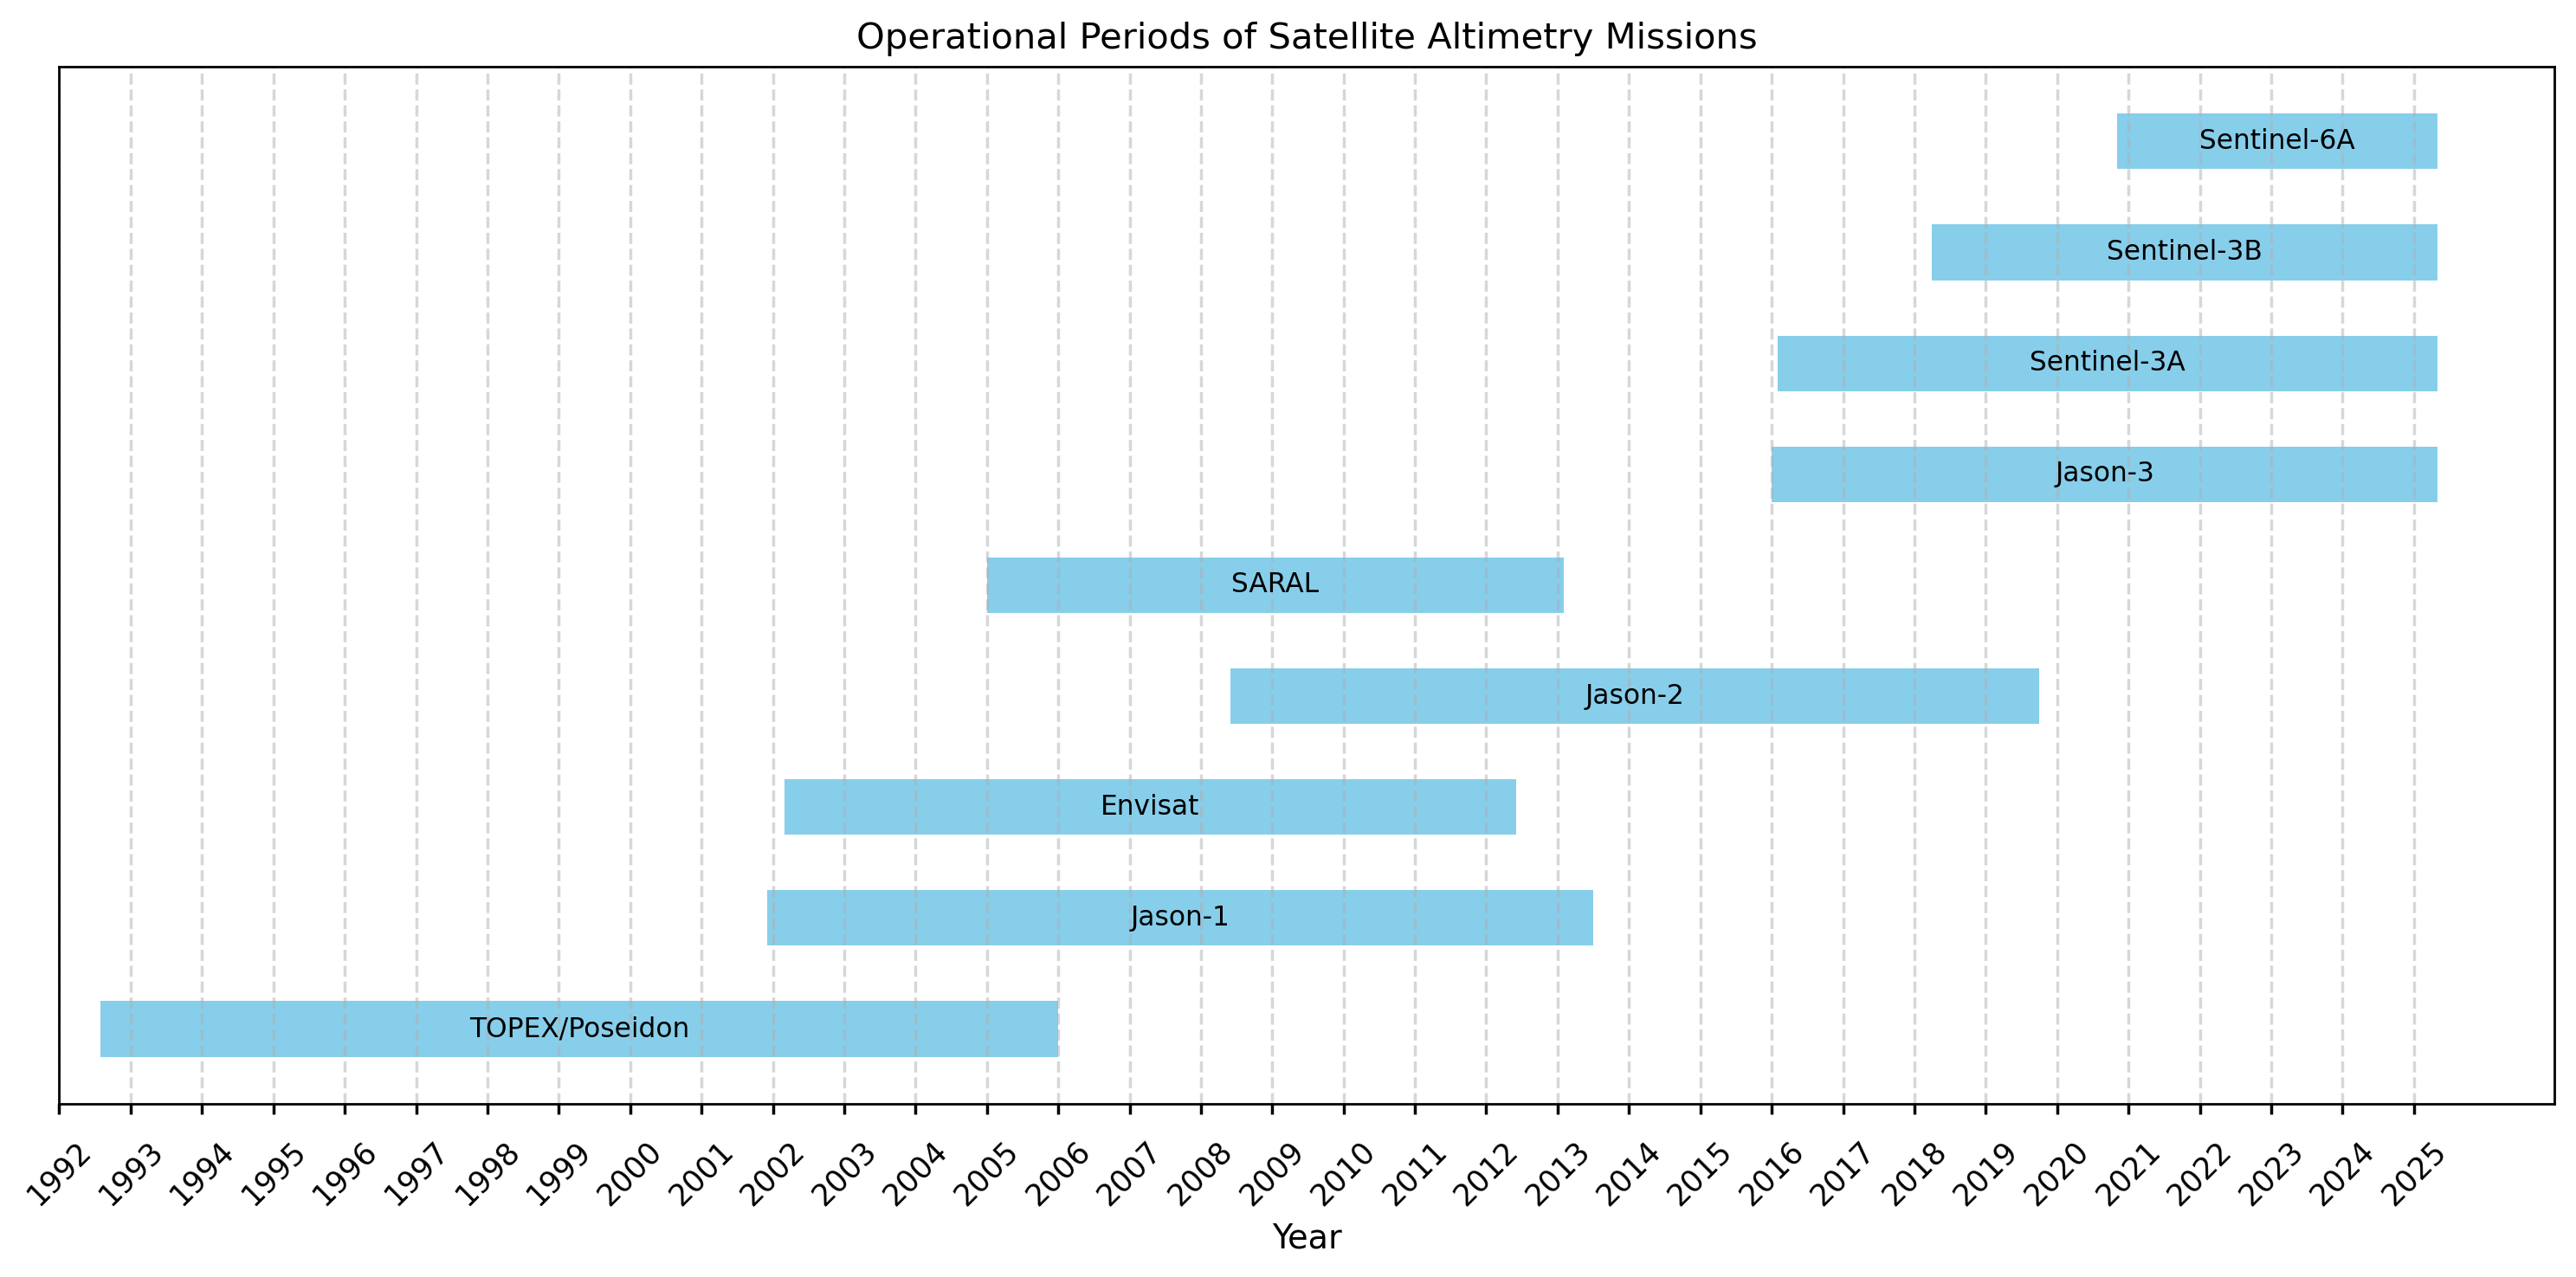

In [8]:
# Define the satellite missions and their operational periods
missions = {
    "TOPEX/Poseidon": ("1992-08", "2006-01"),
    "Jason-1": ("2001-12", "2013-07"),
    "Envisat": ("2002-03", "2012-06"),
    "Jason-2": ("2008-06", "2019-10"),
    "SARAL": ("2013-02", "2005"),
    "Jason-3": ("2016-01", "2025-05"),  # Adjust end date as needed
    "Sentinel-3A": ("2016-02", "2025-05"),  # Adjust end date as needed
    "Sentinel-3B": ("2018-04", "2025-05"),  # Adjust end date as needed
    "Sentinel-6A": ("2020-11", "2025-05"),  # Adjust end date as needed
}

# Convert the mission data into a DataFrame
df = pd.DataFrame([
    {"Mission": mission, "Start": pd.to_datetime(start), "End": pd.to_datetime(end)}
    for mission, (start, end) in missions.items()
])

# Sort the DataFrame by start date
df = df.sort_values(by="Start").reset_index(drop=True)

# Calculate durations in days
df["Duration"] = (df["End"] - df["Start"]).dt.days

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_dpi(250)
# Plot the bars (same as before)
for idx, row in df.iterrows():
    ax.barh(idx, row["Duration"], left=row["Start"], height=0.5, color='skyblue')
    ax.text(row["Start"] + pd.Timedelta(days=row["Duration"] / 2),
            idx,
            row["Mission"],
            va='center', ha='center', fontsize=9)

# Create a range of years for ticks
start_year = df["Start"].dt.year.min()
end_year = df["End"].dt.year.max()
years = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='YS')

# Set x-axis ticks to January of each year
ax.set_xticks(years)
ax.set_xticklabels([date.strftime('%Y') for date in years], rotation=45)

# Enable grid for x-axis
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Axis labels and title
ax.set_xlabel("Year")
ax.set_title("Operational Periods of Satellite Altimetry Missions")
ax.set_yticks([])  # Optional: Hide y-ticks if labels are in bars

plt.tight_layout()
plt.show()

*Figure 2. Span of the satellite missions used to estimate water levels in the C3S–LWL v5.0 dataset. The time periods reflect the operational availability of each mission as described in the Algorithm Theoretical Basis Document ([ATBD](https://confluence.ecmwf.int/pages/viewpage.action?pageId=425328942)). A correction was applied to the end year of the TOPEX/Poseidon mission to reflect its actual data availability.*

According to the [PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112), the median time step in the lake water level dataset decreases after 2016, indicating an increase in the number of recorded values. This improvement is attributed to the introduction of Sentinel-3A and Jason-3 missions, which provided more frequent overpasses with higher-quality sensors.

For Lake Titicaca, this enhancement is evident post-2016, as months with two records became more common. Following the launch of Sentinel-3B and Sentinel-6A, a further increase in data frequency was observed, with most months after late 2019 containing two records, and some months even having three or four (see *Figure 1*). This indicates a significant improvement in dataset completeness due to these newer missions.

Prior to 2016, the dataset exhibits more gaps, with several months lacking data. This can be explained by the limitations of earlier missions: TOPEX/Poseidon, Jason-1, Envisat, Jason-2, and SARAL. These missions had less precise instruments, making their measurements more susceptible to filtering. Although satellite coverage and sensor quality improved after 2016, a few gaps—such as those seen in 2021—may still occur. The observations from the different satellite missions are processed in three sequential steps, each applying thresholds and filtering criteria to remove bad-quality data. As a result, only high-quality data are retained in the final dataset. Because older satellite sensors generally had lower accuracy, a larger fraction of early observations is filtered out, whereas later missions contribute more usable data. More in depth information on the processing steps to make the C3S-LWL v5.0 dataset can be found in the Algorithm Theoretical Basis Document [(ATBD)](https://confluence.ecmwf.int/pages/viewpage.action?pageId=425328942).

(section-3)=
### 3. IWRM applications

Due to the irregular time steps, annual update frequency, and current absence of Interim Climate Data Records (ICDRs), the C3S–LWL v5.0 dataset is not well-suited for applications requiring high temporal resolution or real-time monitoring, such as flood early warning systems or rapid drought response mechanisms. With the upcoming release of ICDRs on the C3S platform, these limitations are likely to be overcome.

The Climate Data Records (CDRs) of the dataset have a long temporal span, making it valuable for applications that benefit from historical context and trend analysis. This includes assessing interannual variability, long-term climate influences, and understanding hydrological responses to large-scale drivers such as ENSO.

#### Detect seasonality and extreme events

A time series of Lake Titicaca water levels was plotted, highlighting April and December values to illustrate seasonality, as well as the most severe historically reported extreme events.

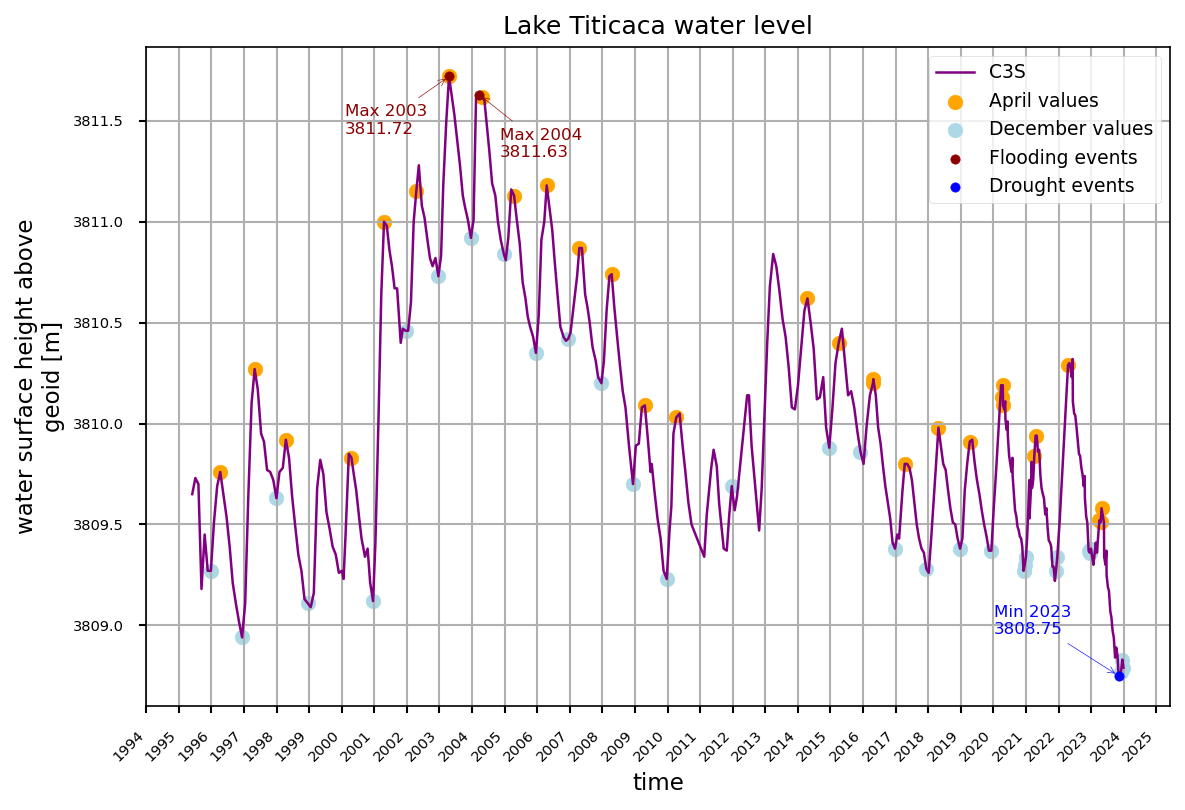

In [78]:
# Extract April and December data
april_values = da.sel(time=da.time.dt.month == 4)
december_values = da.sel(time=da.time.dt.month == 12)

# Convert DataArray time coordinate to a pandas datetime index
time_index = pd.to_datetime(da['time'].values)

# --- Identify extremes ---
# Max in 2003
da_2003 = da.sel(time=da.time.dt.year == 2003)
max_2003 = da_2003.max()
t_max_2003 = da_2003.time[da_2003.argmax().item()]

# Max in 2004
da_2004 = da.sel(time=da.time.dt.year == 2004)
max_2004 = da_2004.max()
t_max_2004 = da_2004.time[da_2004.argmax().item()]

# Min in 2023
da_2023 = da.sel(time=da.time.dt.year == 2023)
min_2023 = da_2023.min()
t_min_2023 = da_2023.time[da_2023.argmin().item()]

# Plot time series
fig, ax = plt.subplots()
fig.set_dpi(150)  # Set the display DPI for the figure
da.plot(ax=ax, label="C3S", color="purple", linewidth=1.2,)

# Add points for April and December with subtler colors
plt.scatter(april_values.time, april_values, color="orange", label="April values")
plt.scatter(december_values.time, december_values, color="lightblue", label="December values")

# --- Add highlighted extremes with safe annotations ---
ax.scatter(t_max_2003.values, max_2003.values, color="darkred", s=20, zorder=5, label="Flooding events")
ax.annotate(f"Max 2003\n{max_2003.values:.2f}", 
            xy=(t_max_2003.values, max_2003.values), 
            xytext=(-50, -27.5), textcoords="offset points", 
            fontsize=8, color="darkred", 
            arrowprops=dict(arrowstyle="->", color="darkred"))

ax.scatter(t_max_2004.values, max_2004.values, color="darkred", s=20, zorder=5)
ax.annotate(f"Max 2004\n{max_2004.values:.2f}", 
            xy=(t_max_2004.values, max_2004.values), 
            xytext=(10, -30), textcoords="offset points", 
            fontsize=8, color="darkred", 
            arrowprops=dict(arrowstyle="->", color="darkred"))


ax.scatter(t_min_2023.values, min_2023.values, color="blue", s=20, zorder=5, label="Drought events")
ax.annotate(f"Min 2023\n{min_2023.values:.2f}", 
            xy=(t_min_2023.values, min_2023.values), 
            xytext=(-60, 20), textcoords="offset points", 
            fontsize=8, color="blue", 
            arrowprops=dict(arrowstyle="->", color="blue"))
# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))  # Remove duplicates by keeping the first occurrence
ax.legend(unique_handles_labels.values(), unique_handles_labels.keys(), fontsize=9)

# Force x-axis to show every year
ax.xaxis.set_major_locator(mdates.YearLocator(1))   # one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # format as YYYY

# Rotate ticks if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
ax.tick_params(axis="both", labelsize=7) 
ax.grid(True, which="major", axis="both")  # ensures vertical grid lines at each year

# Add title
plt.title(f"Lake {request['lake'].title()} water level")

plt.tight_layout()
plt.show()


*Figure 3. Water level in the Titicaca Lake in the period 1995-2023 according to the C3S–LWL v5.0.*

In-situ water level data for Lake Titicaca are not openly available for direct download. Access to this information must be formally requested from the relevant governmental institutions in Peru and Bolivia. However, the Bolivian National Meteorological and Hydrological Service (SENAMHI) publishes a weekly bulletin that reports information on Lake Titicaca. The figure below, extracted from the SENAMHI bulletin of August 1, 2025, presents the time series of monthly average water levels recorded at the Huatajata Station [[4]](https://senamhi.gob.bo/meteorologia/boletines/hidrologico/LagoTiticaca/2025/Agosto/LAGO%20TITICACA%20-%20Informe%20Semanal%20%28Actualizado%2001_08_2025%29.pdf).

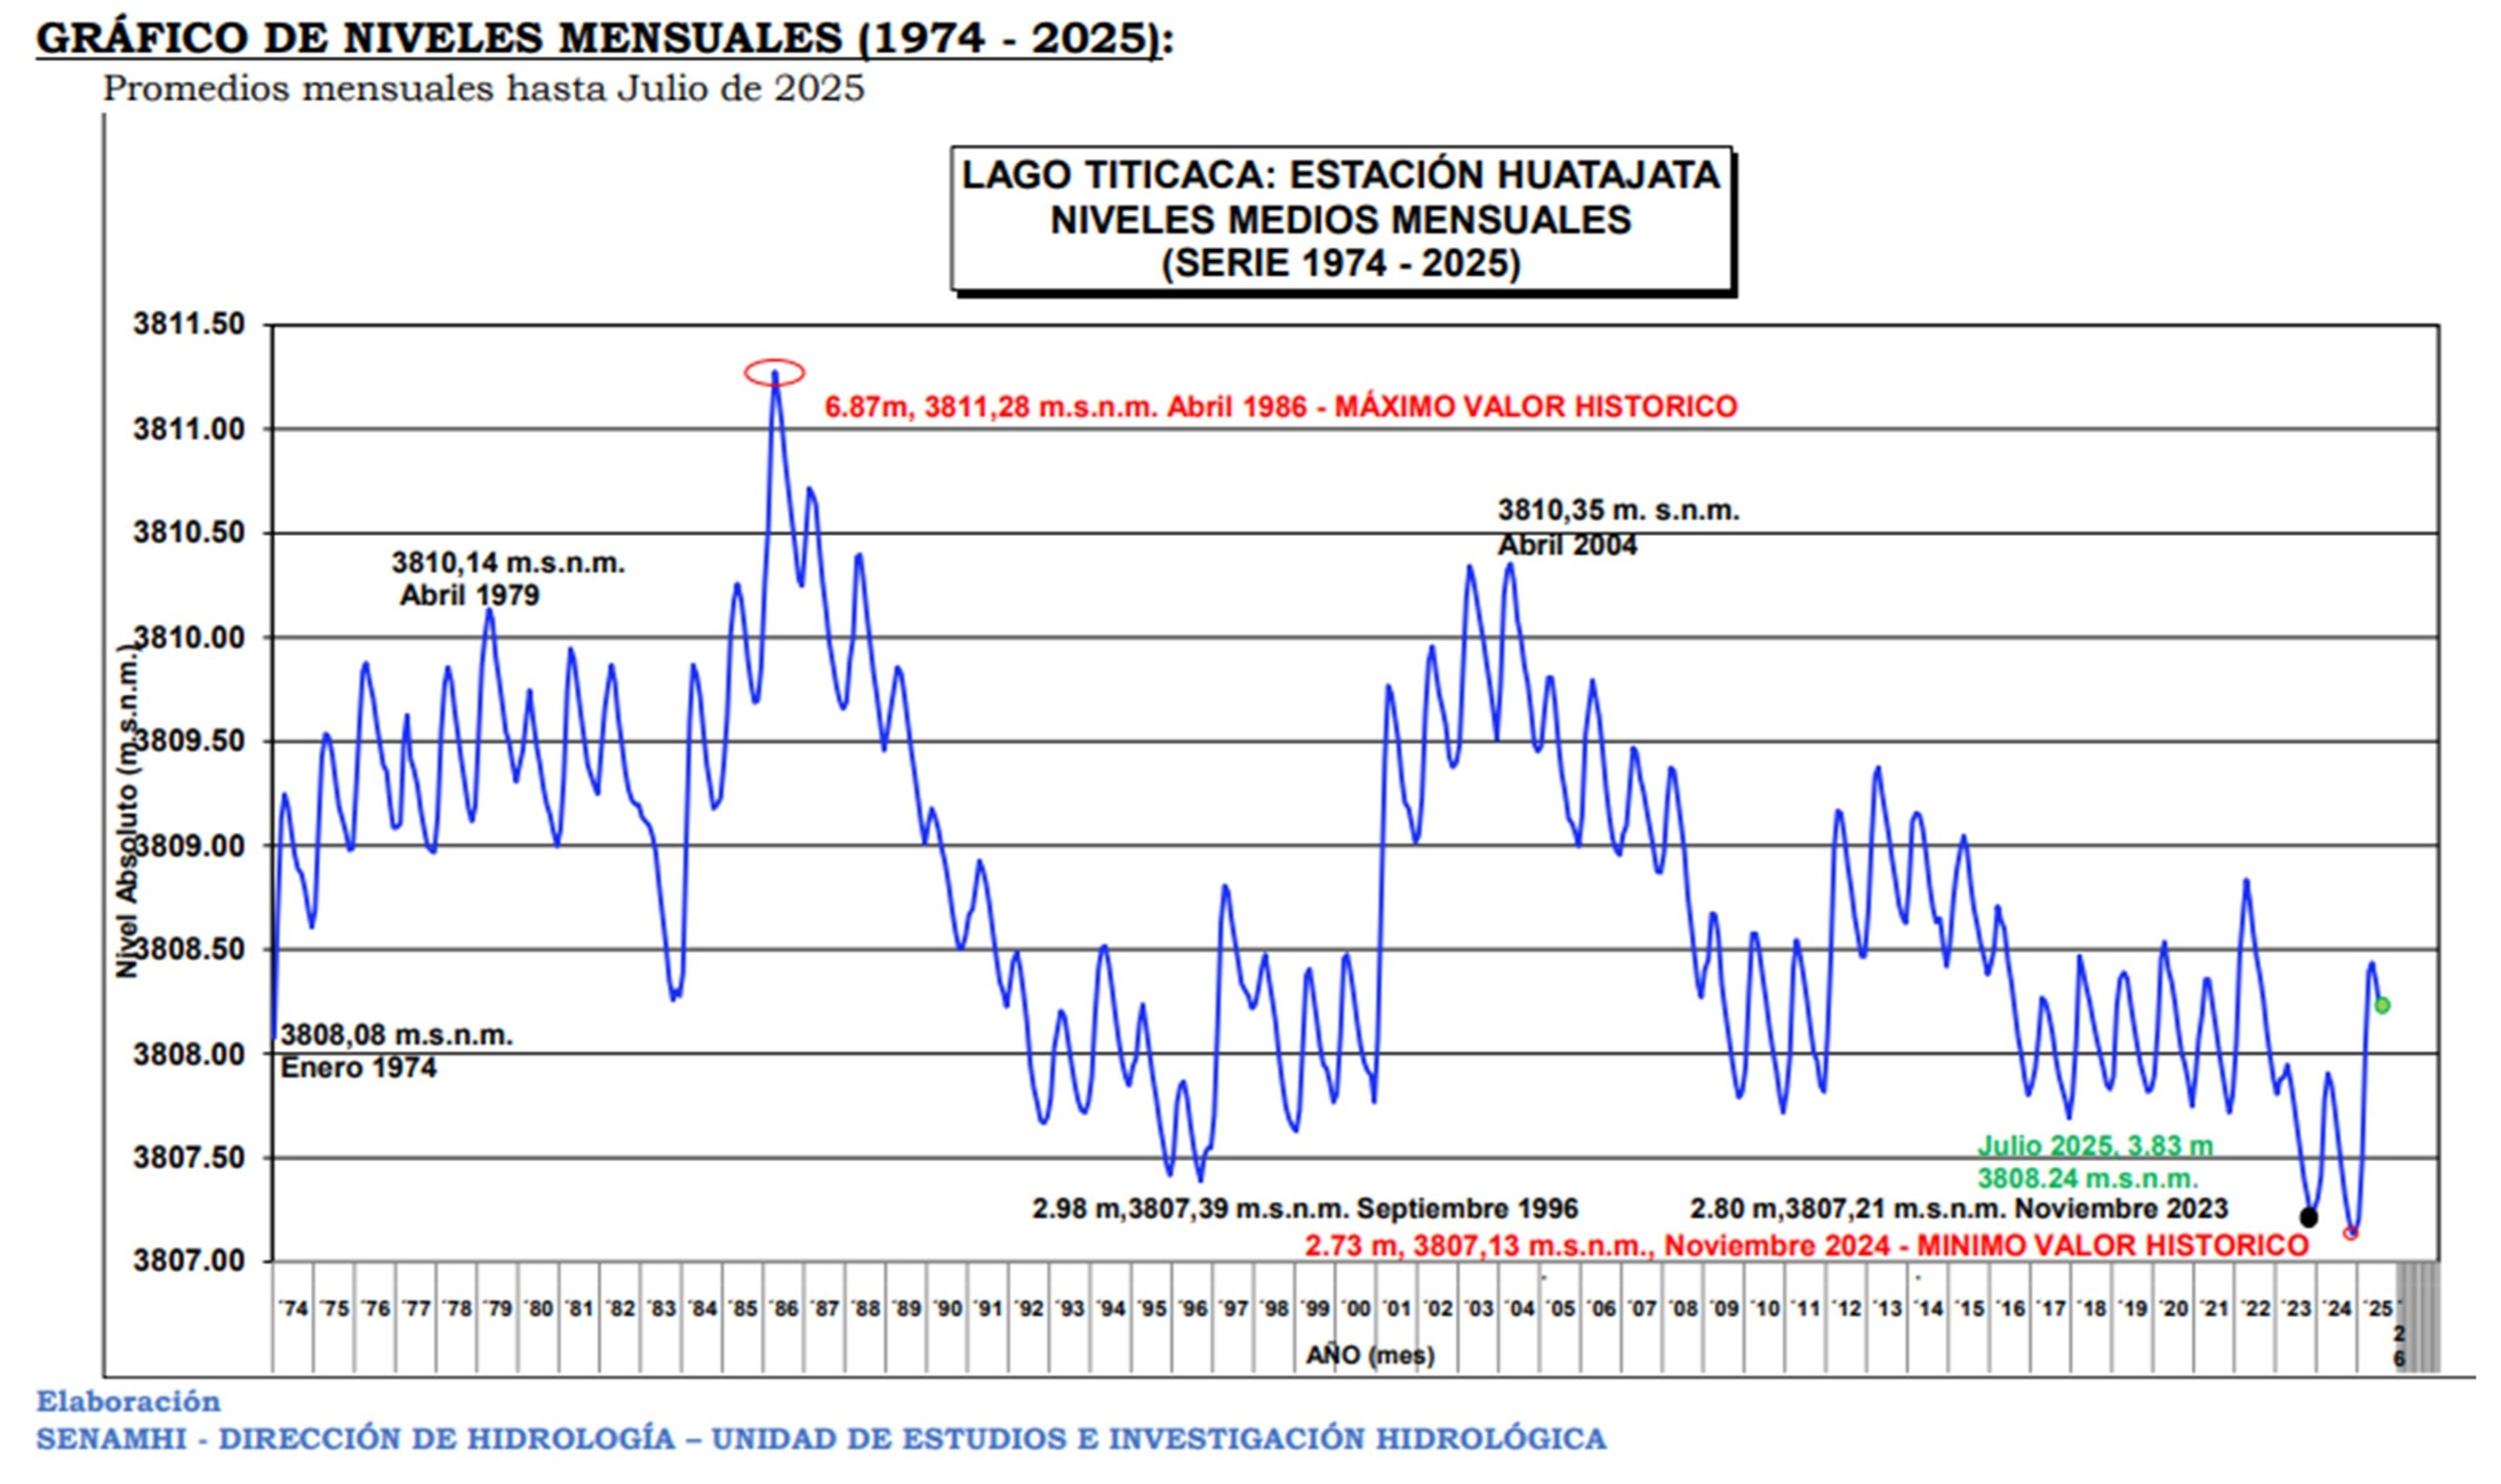

*Figure 4. Monthly averaged water level Lake Titicaca (1974-2025). Source: SENAMHI Bolivia (2025) [[4]](https://senamhi.gob.bo/meteorologia/boletines/hidrologico/LagoTiticaca/2025/Agosto/LAGO%20TITICACA%20-%20Informe%20Semanal%20%28Actualizado%2001_08_2025%29.pdf)*

An approximate comparison between the C3S-LWL data and the in-situ measurements was performed using Figures 3 and 4. To achieve this, the C3S-LWL figure was placed on top of SENAMHI’s figure with transparency, and the vertical and horizontal scales were adjusted to be identical. The time (x) axis was aligned to match SENAMHI’s figure, and the graph was then shifted vertically to best fit the most recent years of SENAMHI’s time series. This approach was necessary because the two datasets use different datums (approx. 1.5 m difference); since the most recent C3S data are considered more reliable, priority was given to visually aligning the later years. The result is presented in *Figure 5* below.

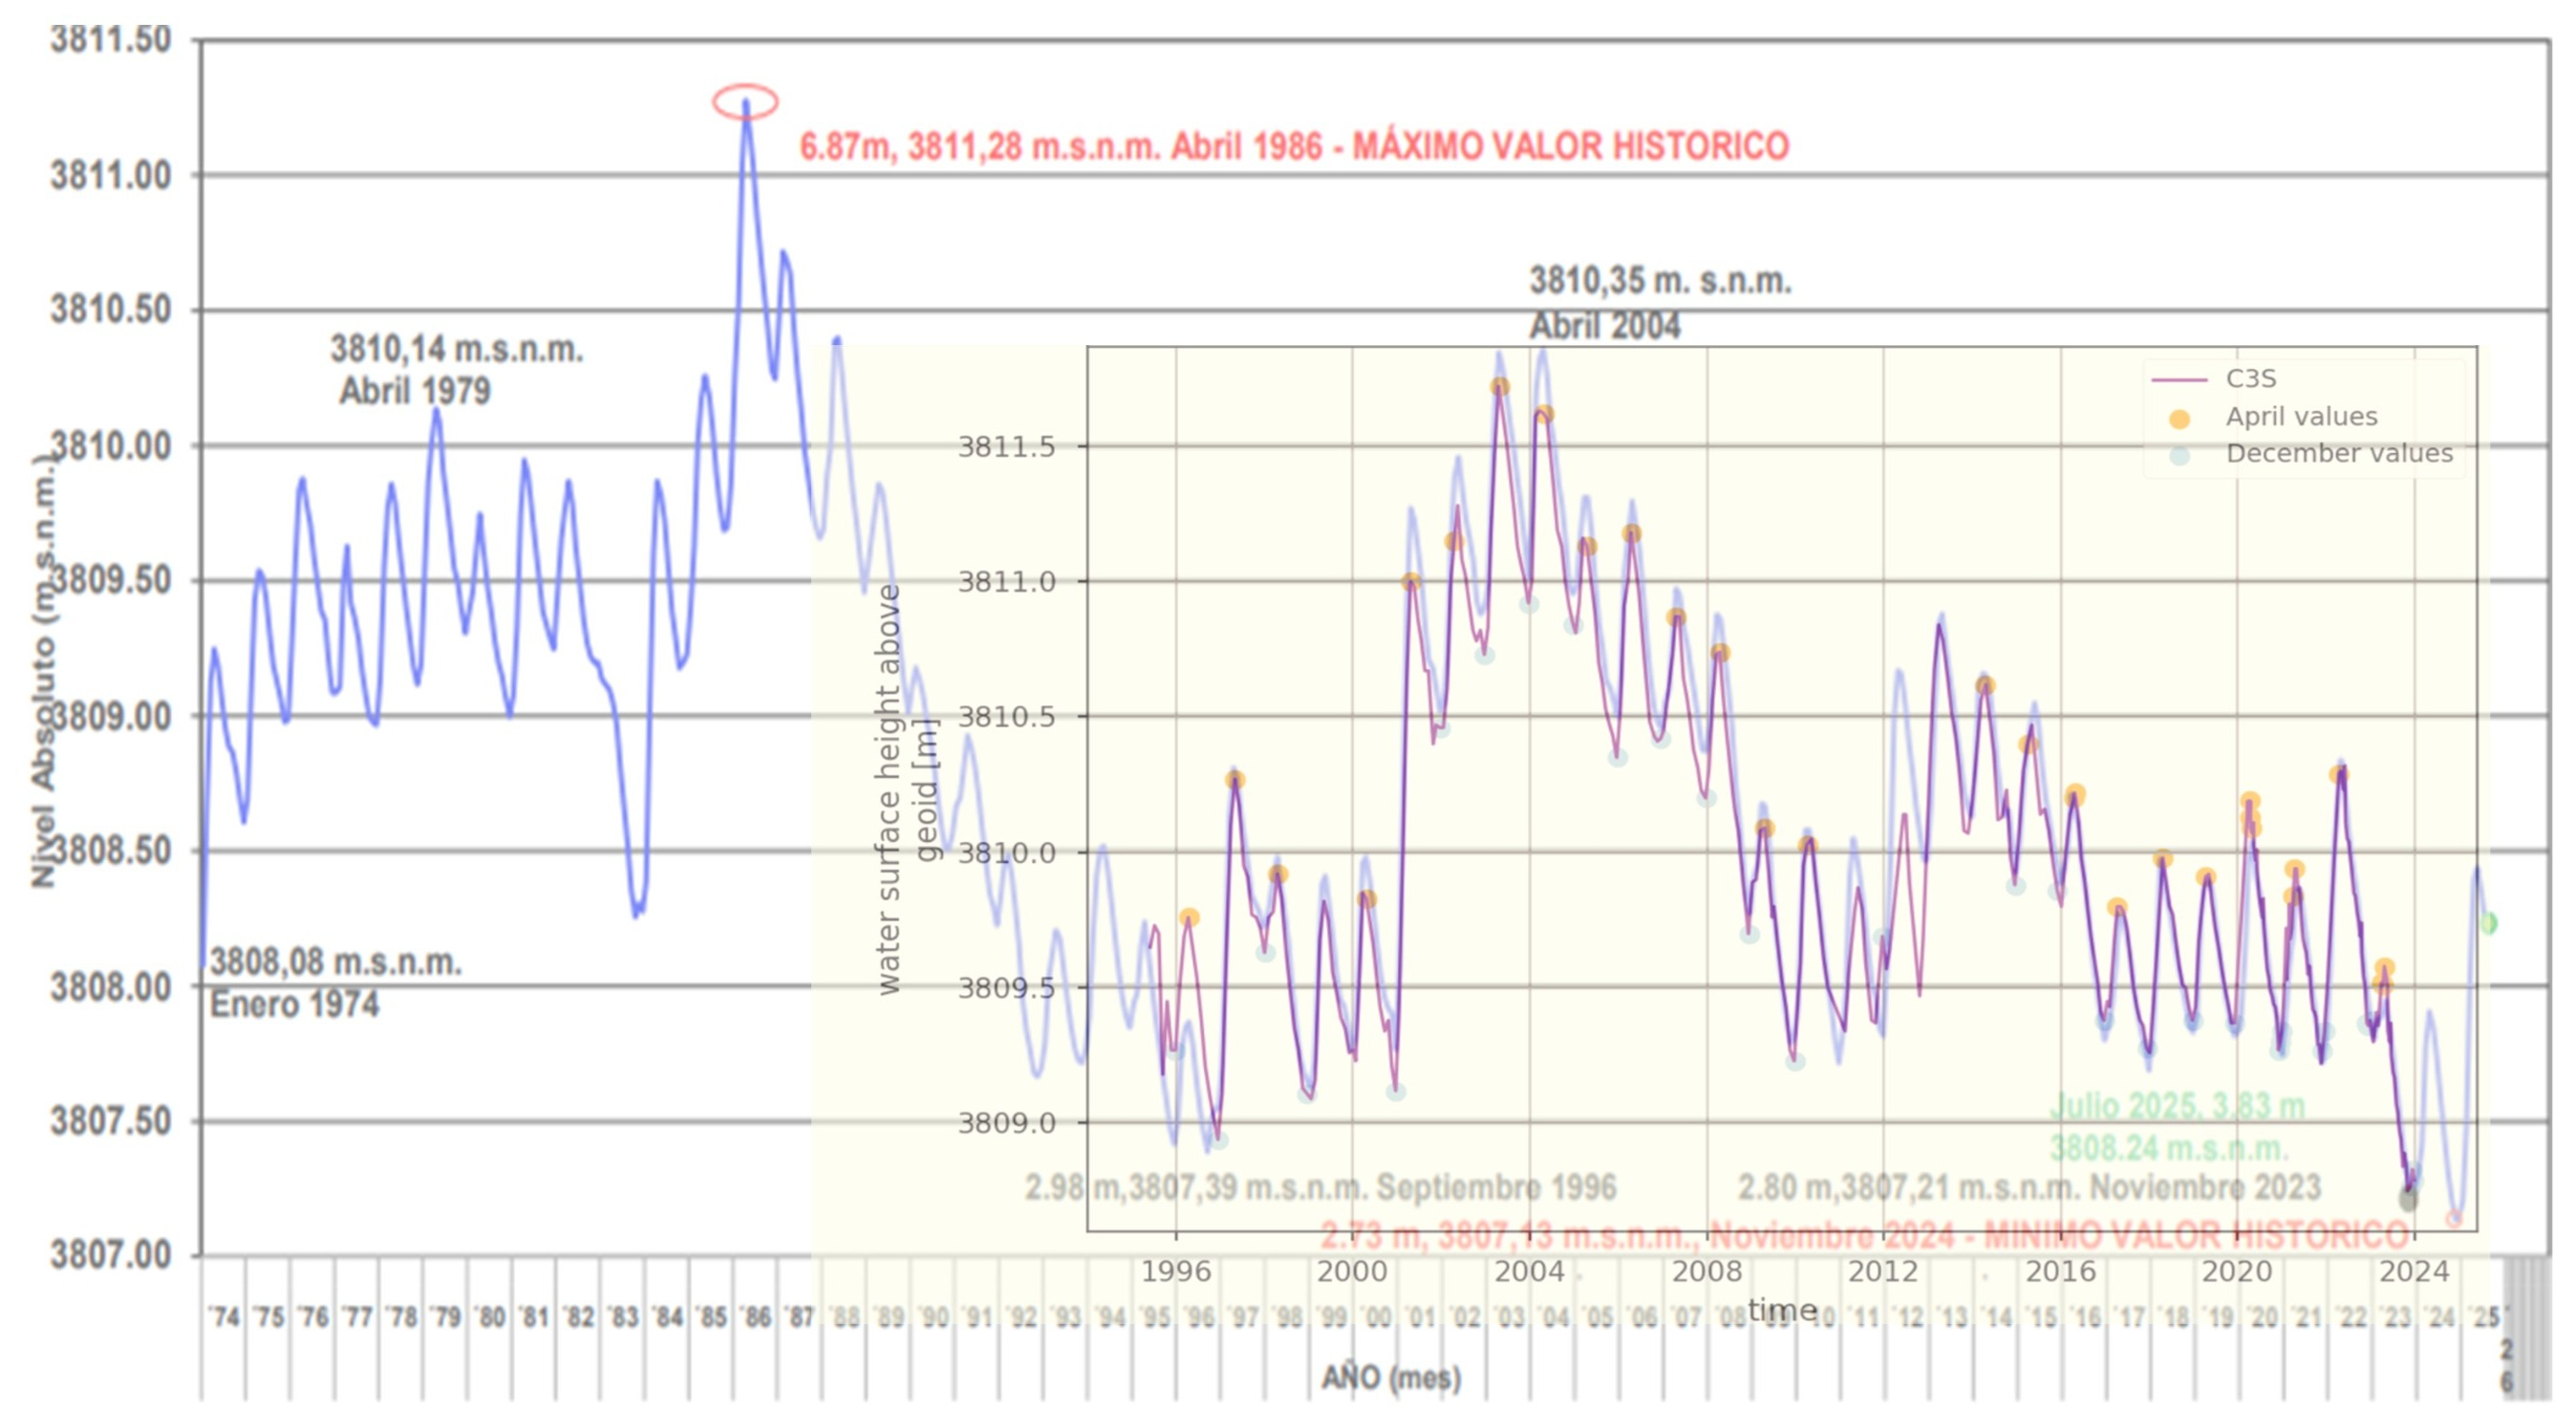

*Figure 5. Overlap of SENAMHI's time series [[4]](https://senamhi.gob.bo/meteorologia/boletines/hidrologico/LagoTiticaca/2025/Agosto/LAGO%20TITICACA%20-%20Informe%20Semanal%20%28Actualizado%2001_08_2025%29.pdf) and Figure 3 using the C3S-LWL data.*

It can be observed in *Figure 5* that C3S–LWL values tend to be lower than those of SENAMHI prior to 2008. However, this observation is based on visual inspection only and cannot be corroborated numerically, as no quantitative comparison was applied on.

In [49]:
def missing_months_in_year(da, year):
    # Convert time to a PeriodIndex (monthly)
    months = pd.PeriodIndex(da.time.to_pandas(), freq="M")

    # Select only the chosen year
    year_months = months[months.year == year]

    # Count how many entries exist per month
    counts = pd.Series(year_months).value_counts().sort_index()

    # All months for that year
    all_months = pd.period_range(start=f"{year}-01", end=f"{year}-12", freq="M")

    # Find missing ones
    missing_months = all_months.difference(counts.index)

    return [m.strftime("%B %Y") for m in missing_months]  # e.g. ["March 2012"]

print("Missing months in 2011:", missing_months_in_year(da, 2011))
print("Missing months in 2012:", missing_months_in_year(da, 2012))
print("Missing months in 2013:", missing_months_in_year(da, 2013))

Missing months in 2011: ['January 2011', 'April 2011']
Missing months in 2012: ['March 2012', 'April 2012', 'May 2012', 'August 2012', 'September 2012', 'December 2012']
Missing months in 2013: ['April 2013', 'December 2013']


**Seasonality:**  The annual cycle of rainfall over the TDPS system exhibits a marked seasonality, with a rainy season from December to March that accounts for over 75% of the annual precipitation, a dry season from May to August, and a pre-wet season from September to December [[3]](https://doi.org/10.1016/j.wace.2024.100710). Lake Titicaca's level is primarily influenced by variations in precipitation and high evaporation rates [[5]](https://doi.org/10.5194/hess-29-655-2025). Consequently, December (just before the onset of the rainy season) typically corresponds to the lake’s lowest water level in the hydrological year, while the highest level usually occurs around April, at the end of the rainy season and the start of the dry season. *Figure 3* shows that this seasonality is captured on years with data for April and December. Years with more complete records capture this seasonal cycle more reliably. The largest discrepancies between SENAMHI and C3S-LWL occur in 1996, likely due to lower-quality measurement instruments, and in 2011 and 2012, probably because many months lack observations in the C3S-LWL dataset (see *Figure 5*). In 2013, although April and December are missing, the remaining months still reproduce the seasonal pattern well. Overall, C3S-LWL captures the seasonality of Lake Titicaca effectively, except in years with extended gaps in observations, such as 2012.

**Floods of 2003 and 2004:** The C3S-LWL timeseries reflects the intense precipitation events that occurred in 2003 and 2004 (see *Figure 5*). At the beginning of 2003, extreme rainfall caused Lake Titicaca’s water level to rise significantly. By the end of January 2003, the Peruvian government declared a two-month state of emergency to support affected communities. The most impacted areas in Puno (the region where the Peruvian side of Lake Titicaca is located) included Huancané, Putina, Azángaro, Asillo, and San Antón. By late January, seven deaths and severe damage to infrastructure had been reported [[6]](https://reliefweb.int/report/peru/act-peru-12003-heavy-rainfall) [[7]](https://reliefweb.int/report/peru/flash-floods-leave-peruvian-farmers-devastated).

According to the National Institute of Statistics and Informatics of Peru (INEI), the mean inflow from tributary rivers into Lake Titicaca in January and February 2004 was 158.2% and 33.6% higher than the long-term average, respectively. These surges caused flooding in surrounding areas of the lake (Table 25 in [[8]](https://www.inei.gob.pe/media/MenuRecursivo/boletines/5340.pdf)). 

**Limitations in flood detection:** The C3S–LWL dataset contains only one observation per month for most months prior to late 2019. Therefore, although the flooding events of 2003 and 2004 are visible in the peaks of *Figure 3*, short-lived flash floods that cause rapid water-level changes over shorter time windows are not captured. Similarly, SENAMHI’s data in *Figure 4* consist of monthly averages, which may also smooth out short-duration peaks. This averaging provides a clearer view of long-term lake levels with reduced noise but limits the ability to detect flash floods. The peaks observed in April 2003 and 2004 reflect the cumulative effect of increased inflows during the entire rainy season, whereas shorter-lived flooding events triggered by isolated extreme precipitation are likely underrepresented. A more in-depth analysis of extremes would require data with higher temporal resolution, which is beyond the scope of this study.


**Drought of 2023:** Conversely, the lowest point on the dataset reflects the severe drought experienced in 2023 in the TDPS, which led to a substantial drop in lake levels, reaching a minimum by the end of the year [[9]](https://www.copernicus.eu/fr/node/40141). This event had system-wide consequences, in Puno (Peru) and La Paz (Bolivia), up to 80% of potato and sweet potato and 90% of Andean grains were lost due to water scarcity [[3]](https://doi.org/10.1016/j.wace.2024.100710). From an IWRM perspective, capturing and understanding these extremes is critical for guiding investment in adaptive infrastructure and preparing multisectoral response strategies. It also underscores the need for transboundary coordination, as hydrological impacts in one part of the system inevitably propagate throughout the TDPS basin.

#### Relation to ENSO

In the TDPS region, El Niño events are typically associated with drier conditions, while La Niña events often bring increased rainfall, particularly during the wet season (December-March). These precipitation patterns directly influence Lake Titicaca's hydrology. El Niño years tend to reduce inflows and lower lake levels, whereas La Niña years usually promote higher inflows and rising water levels. However, the 2022-2023 drought illustrates that La Niña can also be linked to severe dry conditions, particularly during the pre-wet season (September-November). Unlike its wet-season effects, La Niña during this early period is associated with decreased precipitation, which can delay the onset of the rainy season and heighten the risk of drought. Gutierrez-Villarreal et al. (2024) explain that the 2022-23 pre-wet season was one of the driest on record, with November 2022 marking the driest month in 58 years. As a result, Lake Titicaca’s seasonal rise was significantly suppressed, its water level increased by only 0.09 meters between December and April, one of the weakest rises since 1940. Notably, the lake level even declined between December and January, a rare occurrence during a period when levels typically rise [[3]](https://doi.org/10.1016/j.wace.2024.100710).

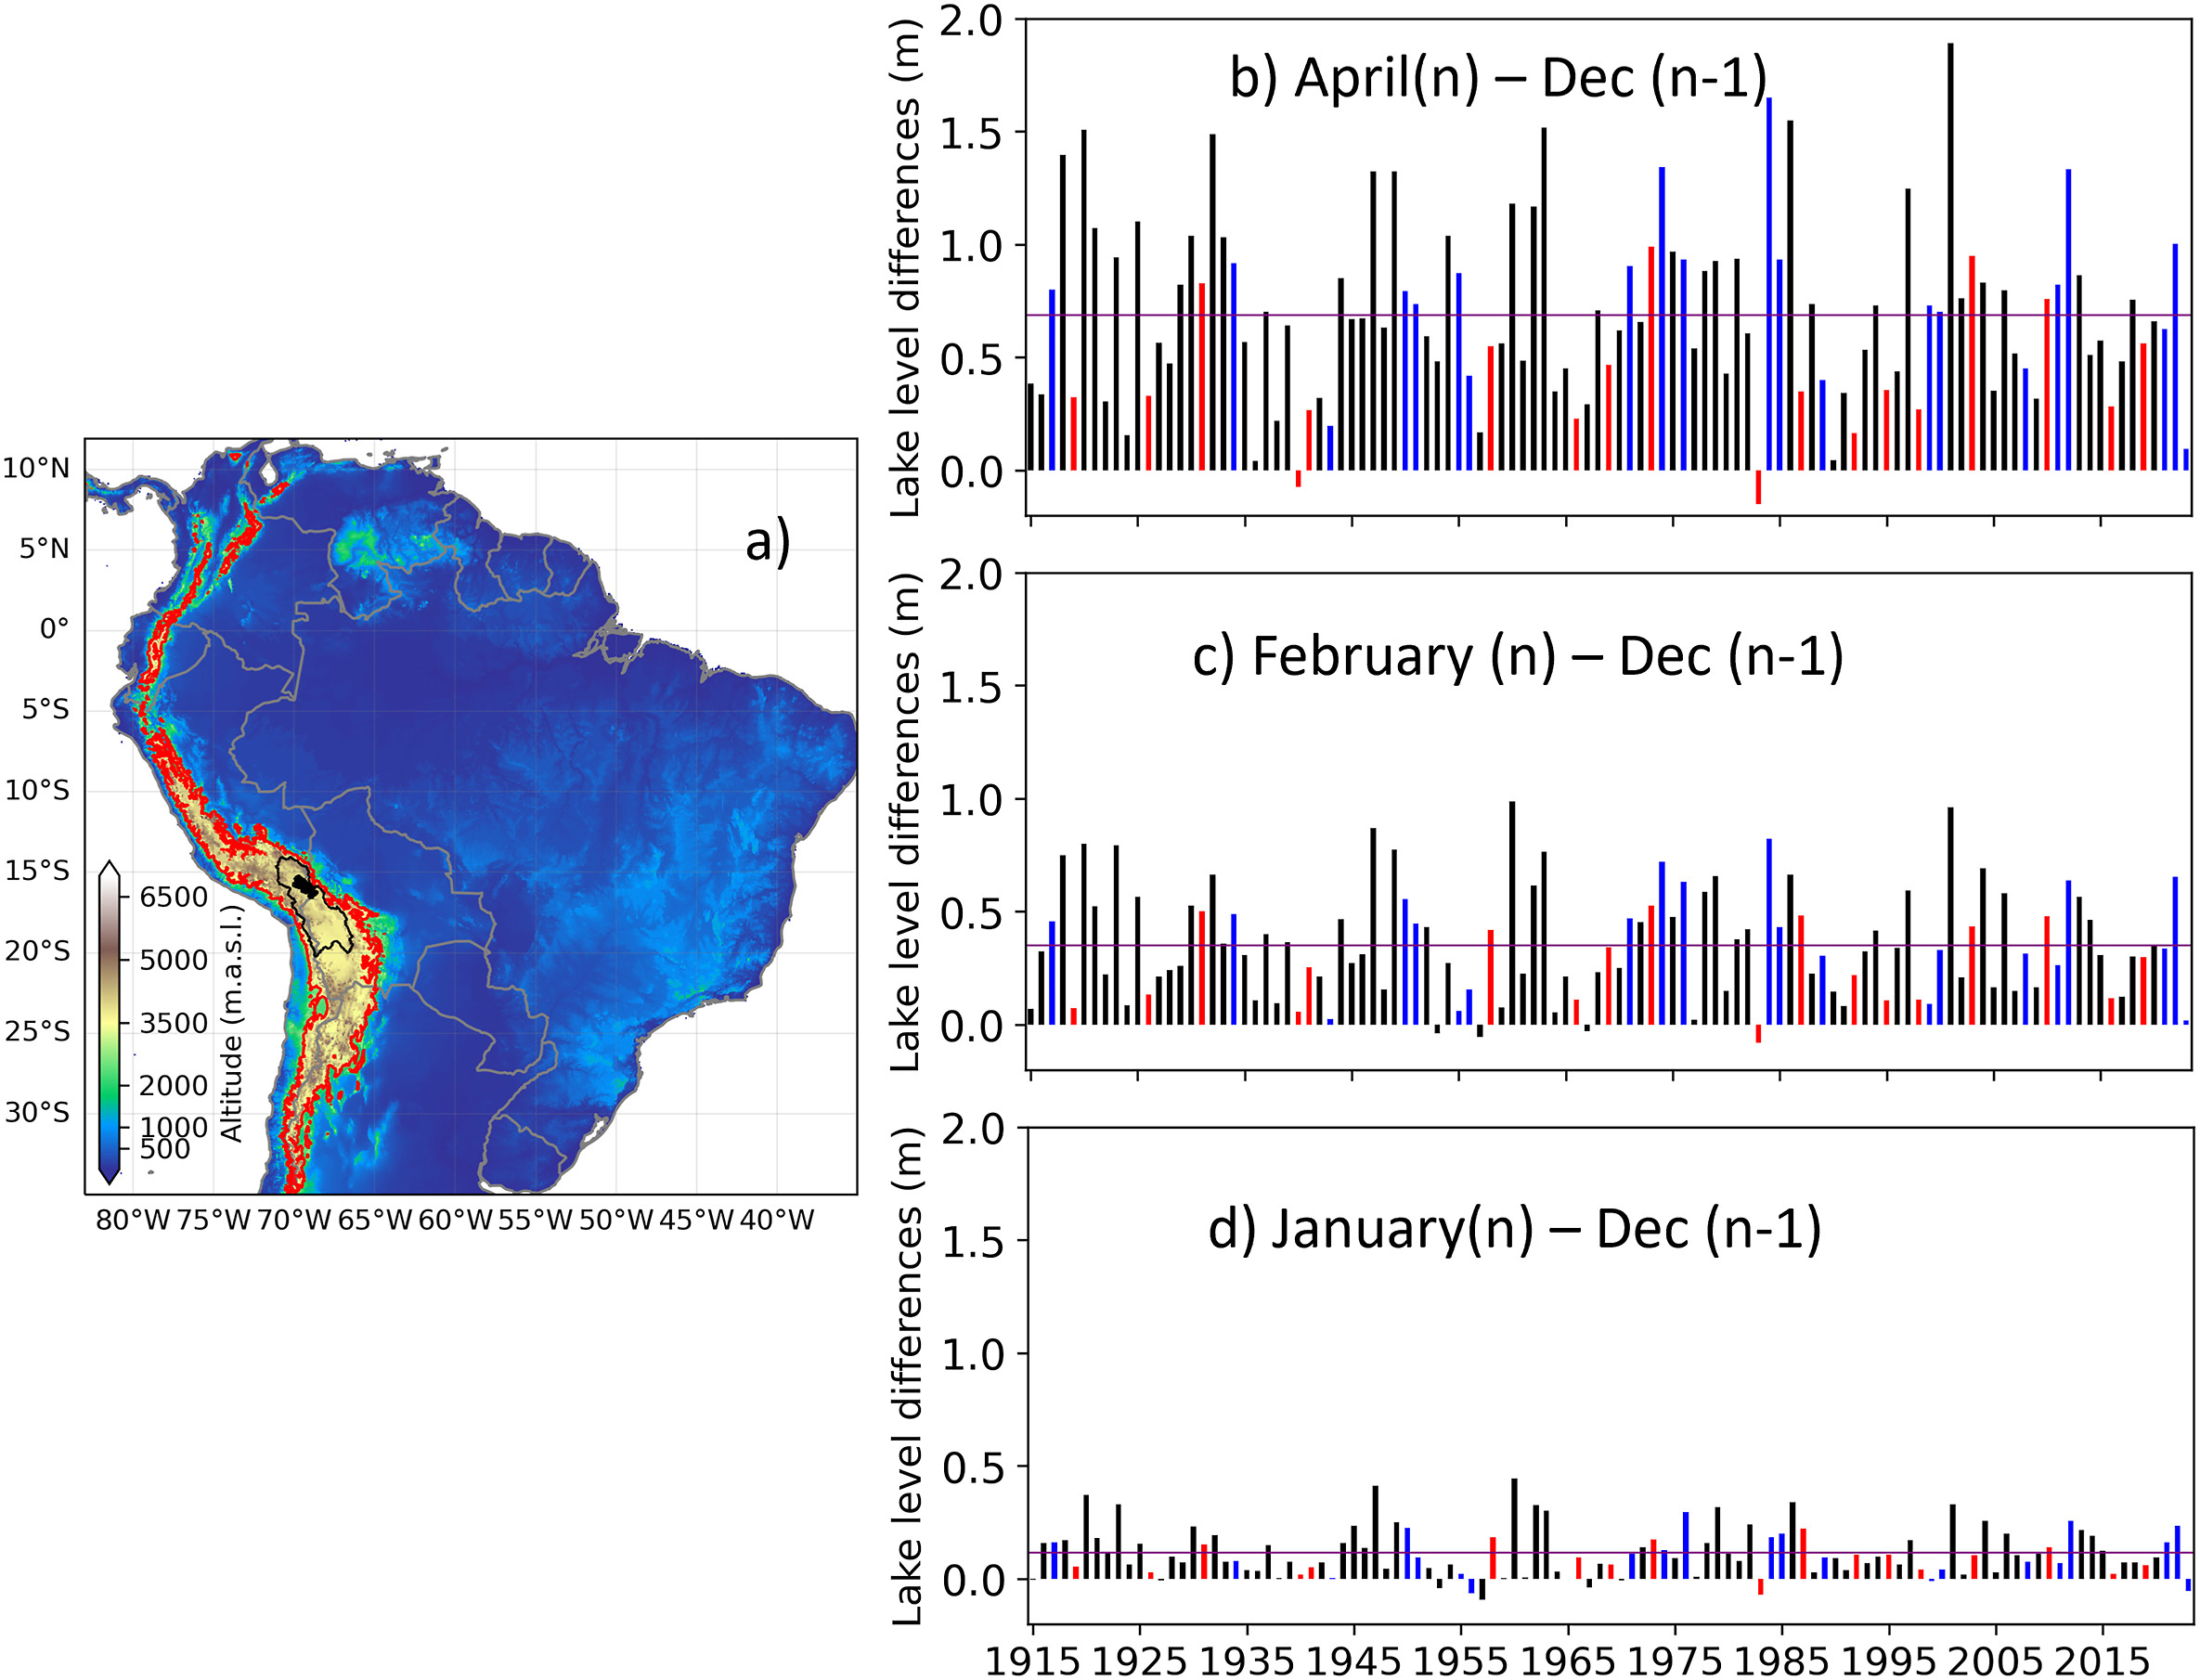

*Figure 6. Lake Titicaca's geographical location and hydrograms. a) The Lake Titicaca, Desaguadero River, and Lake Poopó basins (TDPS system) boundary is delimited by a black line, and the lake area is represented by a black polygon. Red lines in the Andean cordillera denote altitudes of 3 000 m.a.s.l. Interannual increment of lake levels of b) April, c) February, and d) January, with respect to December. The dataset spans between 1914 and 2023. The purple horizontal lines represent the long-term (1914–2023) average of lake level differences. “n” refers to the calendar year. Selected El Niño (La Niña) years are tagged with red (blue) bars if the [El Niño 3.4 index from the HadiSST](https://psl.noaa.gov/data/timeseries/month/Nino34/) [[10]](https://doi.org/10.1029/2002jd002670). dataset is higher (lower) than 0.75 (−0.75) during at least 4 months between October n-1 and April n. Reproduced from Gutierrez-Villarreal et al. (2024), licensed under CC BY 4 [[3]](https://doi.org/10.1016/j.wace.2024.100710).*

The water levels used by Gutierrez-Villarreal et al. (2024) to make *Figure 6* are monthly lake level data from 1914 to 2023, measured at the Muelle Enafer station (3,800 m a.s.l.) on the Peruvian side of Lake Titicaca, and provided by Peru’s National Meteorology and Hydrology Service (SENAMHI) [[3]](https://doi.org/10.1016/j.wace.2024.100710). The figure illustrates how water levels in Lake Titicaca can be a valuable indicator for analysing the relationship between ENSO phases and extreme events in the TDPS system, an insight that is highly relevant for IWRM due to its implications for drought preparedness and long-term planning. A similar analysis was conducted here using the C3S–LWL v5.0 dataset, to assess whether the patterns and anomalies described in the original study can also be detected with this alternative data source.


In [76]:
# Load Niño 3.4 SST Index from the HadISST1.1 (https://psl.noaa.gov/data/timeseries/month/Nino34/)
csv_url = "https://psl.noaa.gov/data/timeseries/month/data/nino34.long.anom.csv"
with fsspec.open(f"simplecache::{csv_url}") as file:
    df_enso = pd.read_csv(file)
df_enso.rename(columns={df_enso.columns[1]: "nina34"}, inplace=True)

In [12]:
# Extract April and December data
feb_values = da.sel(time=da.time.dt.month == 2)
jan_values = da.sel(time=da.time.dt.month == 1)

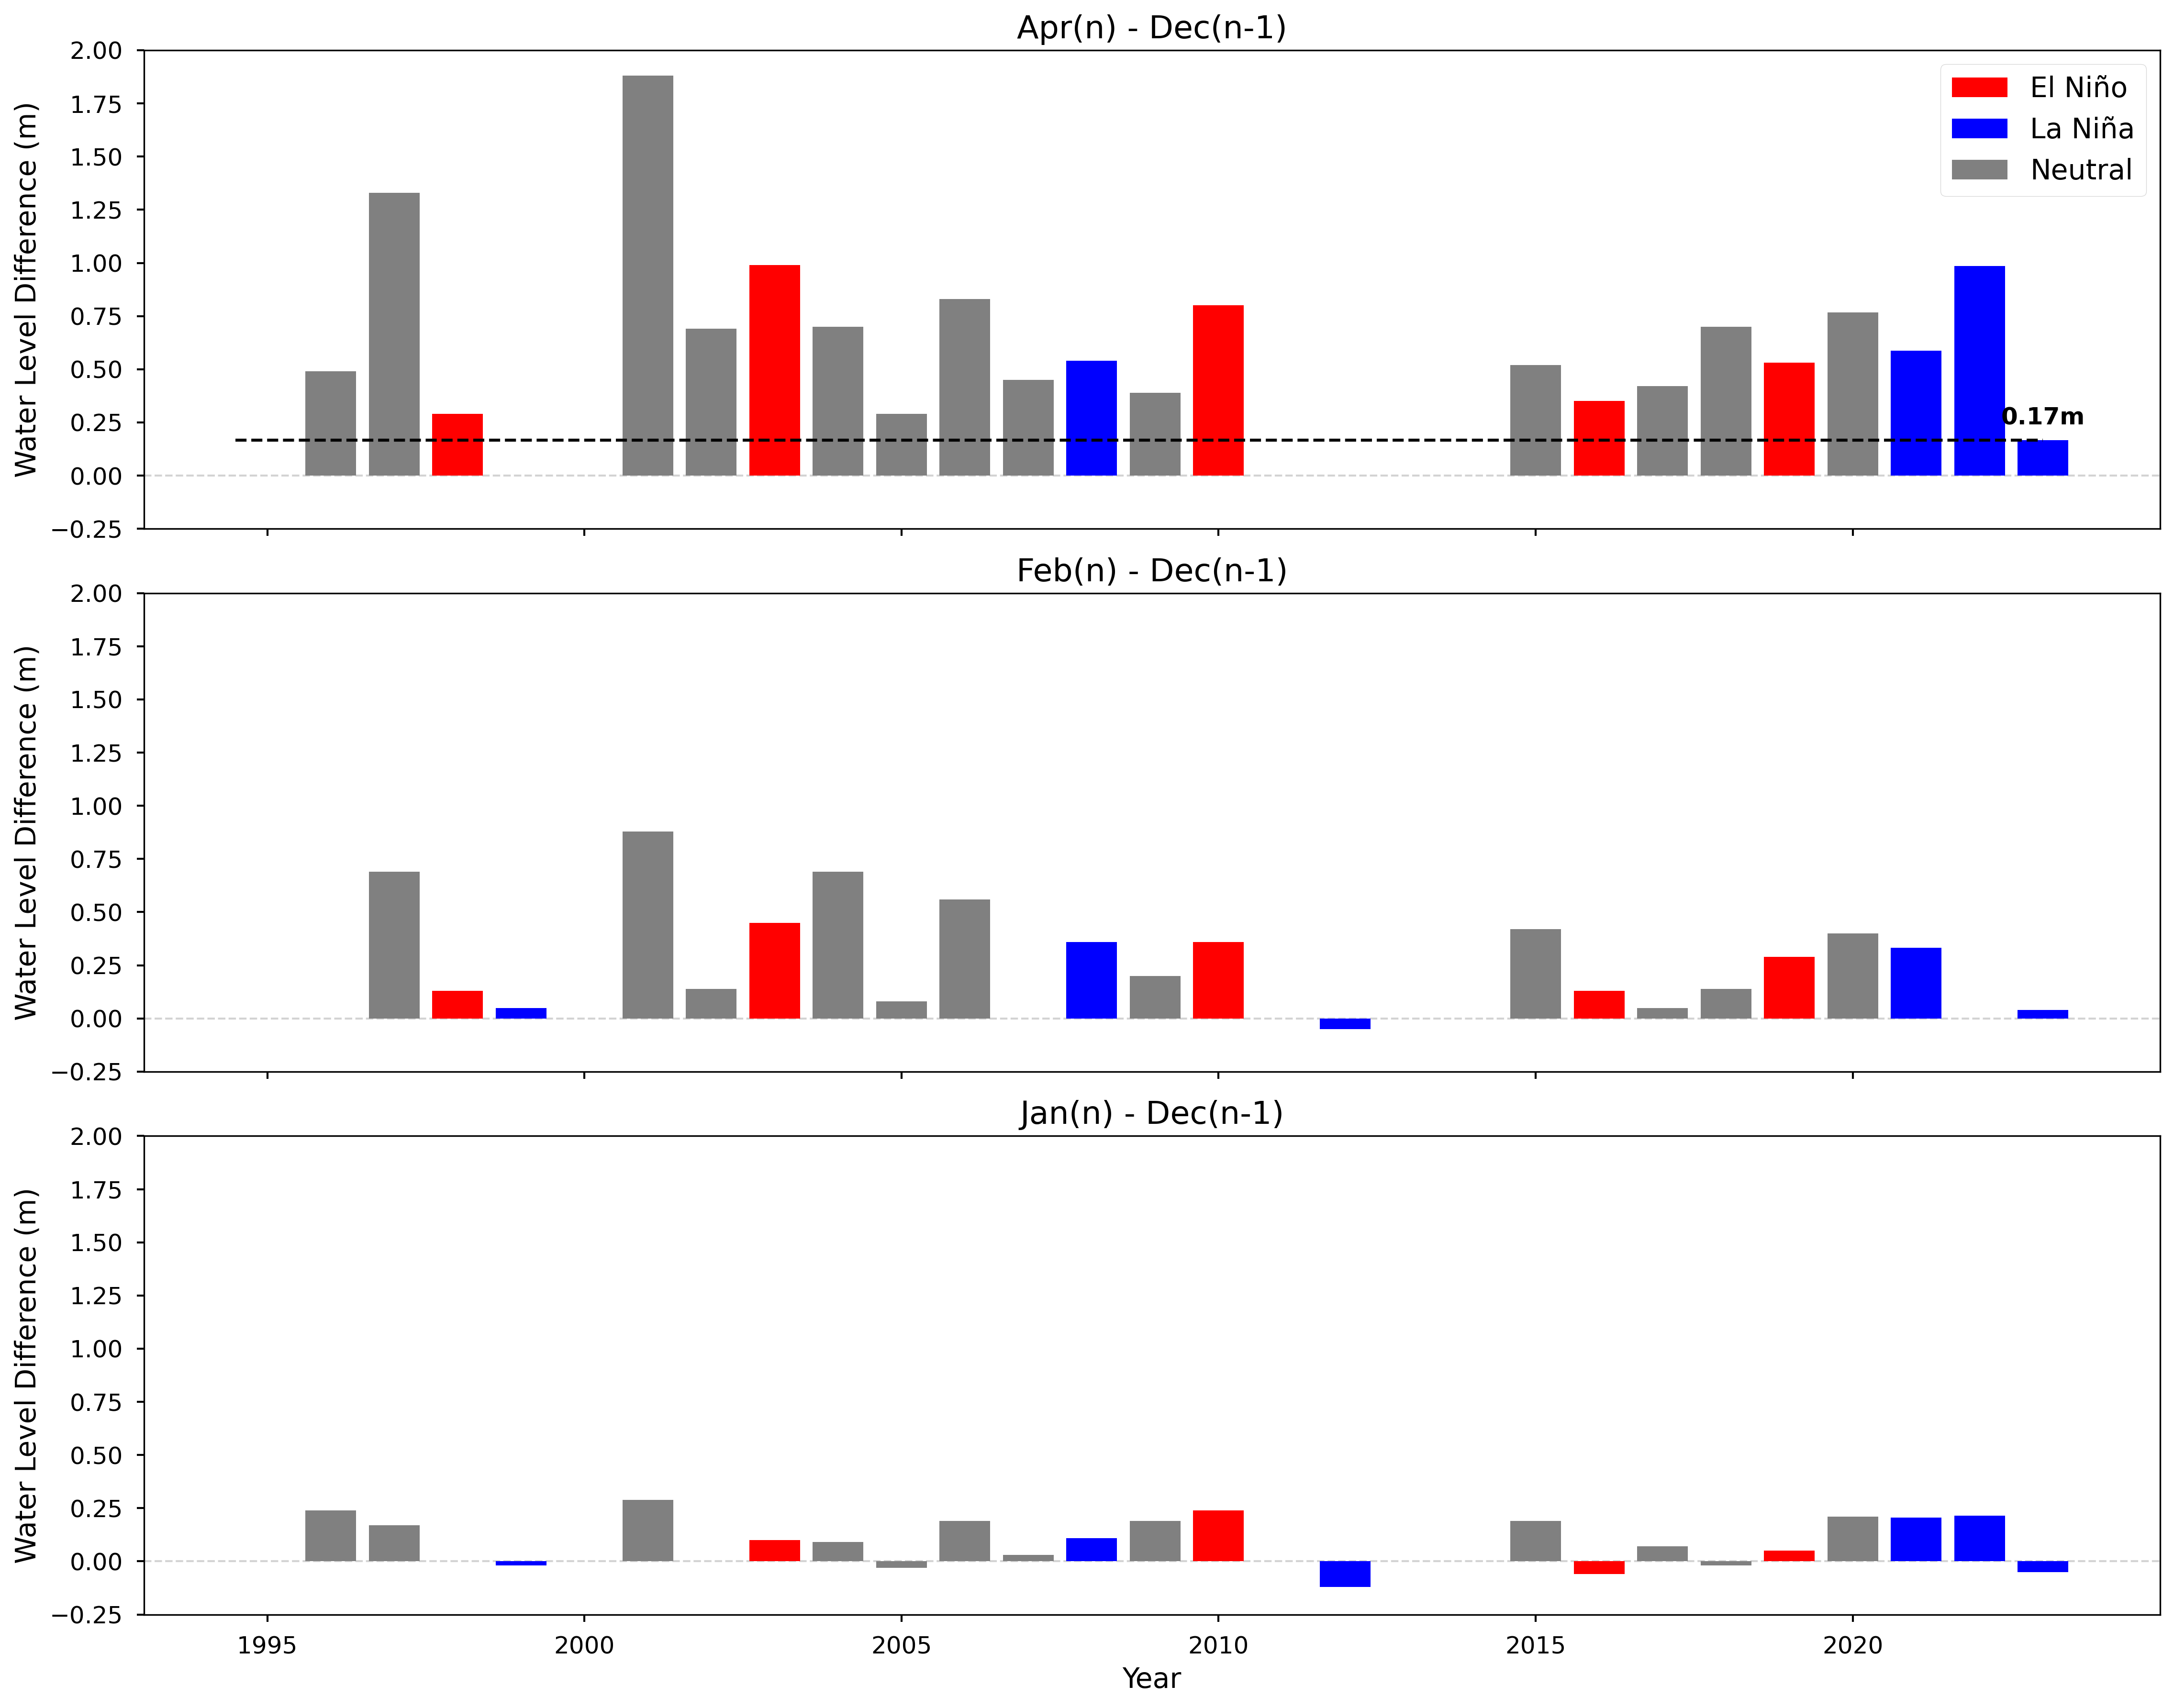

In [13]:
# Rename ENSO column
df_enso['Date'] = pd.to_datetime(df_enso['Date'])
df_enso.set_index('Date', inplace=True)
df_enso.replace(-9999.0, np.nan, inplace=True)

# Function to compute differences and ENSO-colored bar data
def compute_diffs(month_values, dec_values, label):
    # Mean per year
    month_df = month_values.to_dataframe(name='value').reset_index()
    month_df['year'] = month_df['time'].dt.year
    month_mean = month_df.groupby('year')['value'].mean()

    dec_df = dec_values.to_dataframe(name='value').reset_index()
    dec_df['year'] = dec_df['time'].dt.year
    dec_mean = dec_df.groupby('year')['value'].mean()

    # Calculate difference
    diffs = []
    years = []
    for y in range(1995, 2024):  # Full year range
        if y in month_mean and (y - 1) in dec_mean:
            diffs.append(month_mean[y] - dec_mean[y - 1])
            years.append(y)

    diff_series = pd.Series(diffs, index=years)

    # Compute ENSO-based bar colors
    colors = []
    for year in diff_series.index:
        months = pd.date_range(start=f'{year-1}-10-01', end=f'{year}-04-30', freq='MS')
        nina_vals = df_enso.loc[months, 'nina34'].dropna()
        nino_count = (nina_vals > 0.75).sum()
        nina_count = (nina_vals < -0.75).sum()

        if nino_count >= 4:
            colors.append('red')
        elif nina_count >= 4:
            colors.append('blue')
        else:
            colors.append('gray')

    # Identify missing years
    all_years = set(range(1995, 2024))
    missing_years = sorted(all_years - set(diff_series.index))

    return diff_series, colors, missing_years

# Compute all three
diff_apr, colors_apr, missing_apr = compute_diffs(april_values, december_values, "April")
diff_feb, colors_feb, missing_feb = compute_diffs(feb_values, december_values, "February")
diff_jan, colors_jan, missing_jan = compute_diffs(jan_values, december_values, "January")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.set_dpi(300)  # Set the display DPI for the figure
for i, (ax, diff, colors, label) in enumerate(zip(axes, 
                                                  [diff_apr, diff_feb, diff_jan],
                                                  [colors_apr, colors_feb, colors_jan],
                                                  ['Apr(n) - Dec(n-1)', 'Feb(n) - Dec(n-1)', 'Jan(n) - Dec(n-1)'])):
    ax.bar(diff.index, diff.values, color=colors)
    ax.set_ylabel("Water Level Difference (m)", fontsize=14)
    ax.set_title(label, fontsize=16)
    ax.set_ylim(-0.25, 2)
    ax.tick_params(axis='both', labelsize=12)
    ax.axhline(0, color='lightgray', linewidth=1, linestyle='--', zorder=0)

    # Only for the April plot, add marker and text
    if i == 0 and 2023 in diff.index:
        y_val = diff[2023]
        # Horizontal line from y-axis to the bar at y_val
        ax.hlines(y=y_val, xmin=1994.5, xmax=2023, colors='black', linestyles='--', linewidth=1.5)
        # Add text above the 2023 bar
        ax.text(2023, y_val + 0.05, f"{y_val:.2f}m", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Shared x-label
axes[-1].set_xlabel("Year", fontsize=14)

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='El Niño'),
                   Patch(facecolor='blue', label='La Niña'),
                   Patch(facecolor='gray', label='Neutral')]
axes[0].legend(handles=legend_elements, loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

*Figure 7. Yearly differences between water levels of the Titicaca Lake form the C3S-LWL v5.0 dataset in April, February, and January of year *n* and December of year *n-1*, for the period 1995-2023. Bars are color-coded based on ENSO conditions between October *n-1* and April *n*: red for El Niño years (≥ 4 months with Niño 3.4 index > 0.75), blue for La Niña years (≥ 4 months with index < −0.75), and gray for neutral years. Missing bars indicate years where data was unavailable for the respective months.*

In [14]:
# Print missing years for each
print("Missing years (no data for Apr(n) or Dec(n-1)):", missing_apr)
print("Missing years (no data for Feb(n) or Dec(n-1)):", missing_feb)
print("Missing years (no data for Jan(n) or Dec(n-1)):", missing_jan)

Missing years (no data for Apr(n) or Dec(n-1)): [1995, 1999, 2000, 2011, 2012, 2013, 2014]
Missing years (no data for Feb(n) or Dec(n-1)): [1995, 1996, 2000, 2007, 2011, 2013, 2014, 2022]
Missing years (no data for Jan(n) or Dec(n-1)): [1995, 1998, 2000, 2011, 2013, 2014]


In the work of Gutierrez-Villarreal et al. (2024) (see *Figure 6*), the blue bars representing La Niña years are generally taller than the red bars representing El Niño years. This suggests that water level gains during the wet season tend to be greater during La Niña years. Such a trend is clearly visible thanks to the extensive temporal coverage of the SENAMHI dataset, which spans more than 100 years. In contrast, this pattern is not noticeable on *Figure 7*, which uses the C3S-LWL v5.0 dataset. This is likely due to the shorter time span of the C3S dataset and the presence of data gaps, resulting in missing values for several years.

Additionally, some inconsistencies between the two figures can be noted. For instance, in 2012, *Figure 7* shows slightly negative differences for both Jan(*n*)-Dec(*n-1*) and Feb(*n*)-Dec(*n-1*), while according to the SENAMHI dataset (see *Figure 6*) these differences are clearly positive. This discrepancy indicates that the C3S-LWL v5.0 dataset may not be sufficiently accurate for these types of analyses, especially prior to 2016. As mentioned earlier, satellite instrument quality and measurement accuracy have improved significantly since 2016, which may explain some of the observed inconsistencies.

Despite these limitations, the C3S-LWL v5.0 dataset successfully captures the small negative difference in Jan(*n*)-Dec(*n-1*) for the year 2023, as well as the anomalously weak water level increase during the 2022-2023 wet season (see *Figure 7*). However, according to the C3S-LWL v5.0 dataset, the rise was 0.17 m, while the SENAMHI dataset recorded a lower value of 0.09 m. Although not identical, this similarity suggests that the C3S-LWL v5.0 dataset has some utility in identifying recent anomalies, even if it is not yet robust enough for long-term ENSO-related hydrological analysis in Lake Titicaca.

(section-4)=
### 4. Applicability for other lakes

The values from the table presented in *Annex A. LWL Performance indicators* of the [PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112) were used for the analysis in this section.

In [77]:
#Load PQAR table (ANNEX A)
columns = [
    "Lake name",
    "Dispersion 1992-2023 (cm)",
    "High Frequency variation 1992-2023 (cm)",
    "Median Timestep 1992-2023 (days)",
    "Max Timestep 1992-2023 (days)",
    "Timeseries duration 1992-2023",
    "Dispersion 2014-2023 (cm)",
    "High Frequency variation 2014-2023 (cm)",
    "Median Timestep 2014-2023 (days)",
    "Max Timestep 2014-2023 (days)",
]
data = [
    ["Albert", 8.0, 3.32, 26.47, 76.81, 28.5, 6.0, 3.24, 13.0, 76.81],
    ["Bagre", 20.0, 8.65, 9.98, 99.01, 15.3, 18.0, 8.71, 9.98, 89.25],
    ["Bankim", 39.0, 11.03, 9.41, 50.84, 15.5, 9.0, 12.29, 9.31, 50.84],
    ["Bogoria", 13.0, 0.26, 27.0, 55.78, 7.8, 13.0, 0.26, 27.0, 55.78],
    ["Fitri", 10.0, 0.32, 27.0, 70.0, 10.6, 10.0, 0.33, 27.0, 70.0],
    ["George", 3.0, 0.37, 27.0, 81.0, 4.8, 3.0, 0.37, 27.0, 81.0],
    ["Kainji", 22.0, 9.87, 10.22, 113.27, 31.1, 17.0, 11.45, 9.92, 109.07],
    ["Kossou", 59.0, 0.96, 27.0, 136.61, 7.8, 59.0, 0.96, 27.0, 136.61],
    ["Kyoga", 6.0, 6.03, 9.5, 105.85, 31.2, 5.0, 7.1, 7.03, 17.68],
    ["Lagdo", 25.0, 7.1, 29.0, 145.07, 21.4, 13.5, 1.51, 27.0, 145.07],
    ["Langano", 8.0, 0.19, 27.0, 29.41, 7.8, 8.0, 0.19, 27.0, 29.41],
    ["Mangbeto", 14.0, 2.66, 27.0, 54.0, 7.8, 14.0, 2.66, 27.0, 54.0],
    ["Nasser", 10.0, 7.9, 4.64, 64.6, 31.2, 9.0, 8.88, 4.4, 34.4],
    ["Roseires", 14.5, 0.0, 35.0, 175.0, 28.4, 7.0, 20.21, 27.0, 104.0],
    ["Shiroro", 31.0, 20.75, 10.0, 108.0, 15.2, 29.0, 23.91, 10.0, 108.0],
    ["Tana", 4.0, 2.71, 9.92, 50.73, 31.2, 3.0, 3.38, 9.92, 29.75],
    ["Tchad", 13.0, 3.85, 9.92, 139.43, 31.2, 9.0, 4.82, 9.92, 34.4],
    ["Turkana", 3.0, 2.01, 9.92, 68.99, 31.2, 2.0, 2.4, 6.8, 19.83],
    ["Volta", 10.0, 6.31, 9.92, 176.66, 31.2, 8.0, 7.29, 9.92, 19.83],
    ["Ziway", 13.0, 7.43, 26.42, 71.82, 14.9, 12.0, 6.35, 27.0, 51.37],
    ["Azhibeksorkoli", 3.0, 0.29, 27.0, 108.0, 4.9, 3.0, 0.29, 27.0, 108.0],
    ["Baikal", 4.0, 6.4, 1.02, 140.08, 31.2, 4.0, 6.86, 0.98, 28.47],
    ["Baunt", 4.0, 1.71, 27.0, 54.0, 4.9, 4.0, 1.71, 27.0, 54.0],
    ["Bratskoye", 5.0, 10.62, 3.71, 100.01, 31.2, 5.0, 11.85, 1.31, 34.31],
    ["Chlya", 4.0, 1.22, 27.0, 54.0, 4.9, 4.0, 1.22, 27.0, 54.0],
    ["Chukochye", 5.0, 5.6, 25.63, 55.83, 7.8, 5.0, 5.6, 25.63, 55.83],
    ["Hovsgol", 5.0, 9.4, 12.26, 218.71, 31.2, 3.0, 12.2, 6.26, 160.6],
    ["Krasnoyarskoye", 15.0, 20.4, 5.24, 114.32, 21.2, 16.0, 23.0, 4.67, 114.32],
    ["Kulundinskoye", 13.0, 0.74, 27.0, 106.51, 7.7, 13.0, 0.74, 27.0, 106.51],
    ["Novosibirskoye", 12.5, 9.91, 9.92, 270.1, 29.4, 9.0, 11.51, 7.14, 110.63],
    ["Tchany", 28.0, 4.3, 10.03, 105.85, 29.5, 32.0, 5.72, 9.92, 69.41],
    ["Teletskoye", 2.0, 0.69, 27.0, 54.0, 5.0, 2.0, 0.69, 27.0, 54.0],
    ["Tengiz", 9.0, 2.28, 27.07, 197.0, 21.1, 22.0, 1.72, 26.93, 70.0],
    ["Uvs", 10.0, 2.5, 27.36, 249.48, 28.5, 9.0, 2.57, 25.44, 55.83],
    ["Zeyskoye", 7.0, 13.58, 12.57, 208.29, 31.2, 4.0, 17.54, 9.04, 138.82],
    ["Bolmen", 11.0, 0.29, 27.0, 81.0, 5.0, 11.0, 0.29, 27.0, 81.0],
    ["Illmen", 9.0, 6.37, 24.73, 102.2, 28.6, 5.0, 4.95, 7.42, 82.47],
    ["Inarinjarvi", 11.0, 7.05, 23.0, 105.0, 21.1, 12.0, 3.22, 12.63, 71.0],
    ["Kubenskoye", 7.0, 9.6, 11.58, 64.0, 7.8, 7.0, 9.6, 11.58, 64.0],
    ["Kumskoye", 12.0, 4.39, 10.01, 70.0, 21.5, 9.0, 3.59, 10.03, 53.87],
    ["Kuybyshevskoye", 6.0, 10.0, 9.49, 121.55, 31.2, 4.5, 12.08, 4.57, 29.75],
    ["Ladoga", 4.0, 4.12, 2.97, 89.06, 31.2, 4.0, 4.62, 2.19, 27.0],
    ["Onega", 5.0, 5.03, 3.51, 119.72, 31.2, 4.0, 5.73, 1.79, 18.04],
    ["Peipus", 4.0, 5.38, 9.92, 54.75, 31.2, 3.0, 6.7, 7.63, 20.01],
    ["Pyaozero", 51.0, 3.42, 17.61, 105.0, 21.4, 16.0, 3.03, 26.57, 70.16],
    ["Rybinskoye", 5.0, 8.28, 4.82, 91.25, 31.3, 4.0, 9.27, 2.8, 16.53],
    ["Saratovskoye", 10.0, 6.95, 9.98, 96.65, 31.2, 7.5, 8.22, 9.92, 49.58],
    ["Segozerskoye", 17.0, 4.55, 10.0, 161.6, 21.4, 10.0, 4.78, 9.98, 89.63],
    ["Umbozero", 9.0, 0.25, 27.0, 81.0, 7.8, 9.0, 0.25, 27.0, 81.0],
    ["Vanajanselka", 13.5, 0.24, 27.0, 108.0, 7.8, 13.5, 0.24, 27.0, 108.0],
    ["Vanerm", 3.0, 2.63, 6.86, 84.32, 31.2, 2.0, 3.05, 4.0, 20.45],
    ["Vattern", 8.0, 0.54, 26.79, 127.58, 7.8, 8.0, 0.54, 26.79, 127.58],
    ["Amadjuak", 10.0, 14.84, 8.82, 73.25, 29.5, 10.0, 19.0, 8.82, 19.83],
    ["Athabasca", 6.0, 8.29, 2.97, 65.7, 31.3, 5.0, 9.24, 2.56, 16.09],
    ["Atlin", 55.0, 3.64, 18.0, 54.0, 15.0, 50.0, 4.27, 25.42, 54.0],
    ["Aylmer", 7.0, 4.81, 9.92, 97.09, 31.2, 5.0, 6.07, 9.06, 50.0],
    ["Baker", 7.0, 6.98, 9.92, 122.64, 31.2, 7.0, 8.93, 9.92, 25.07],
    ["Bienville", 14.0, 6.82, 9.64, 105.0, 21.5, 12.0, 6.79, 8.1, 51.82],
    ["Big-Trout", 7.0, 4.56, 14.0, 53.82, 7.8, 7.0, 4.56, 14.0, 53.82],
    ["Birch", 8.0, 3.33, 16.6, 91.4, 7.8, 8.0, 3.33, 16.6, 91.4],
    ["Black", 7.0, 3.92, 27.0, 54.0, 7.8, 7.0, 3.92, 27.0, 54.0],
    ["Bluenose", 14.5, 4.43, 16.38, 81.27, 7.7, 14.5, 4.43, 16.38, 81.27],
    ["Caribou", 12.0, 4.49, 9.92, 65.88, 31.2, 12.0, 5.79, 7.19, 39.66],
    ["Cedar", 10.0, 5.18, 9.92, 66.25, 31.2, 8.0, 6.27, 9.92, 29.75],
    ["Churchill", 13.0, 2.98, 26.81, 54.06, 5.0, 13.0, 2.98, 26.81, 54.06],
    ["Claire", 13.0, 3.28, 21.42, 65.42, 7.8, 13.0, 3.28, 21.42, 65.42],
    ["Cormorant", 10.0, 2.44, 27.2, 113.37, 13.4, 11.0, 2.3, 27.0, 84.57],
    ["Cumberland", 21.0, 3.32, 26.72, 79.76, 7.8, 21.0, 3.32, 26.72, 79.76],
    ["Dubawnt", 14.0, 4.64, 9.92, 70.0, 21.5, 15.0, 5.01, 9.47, 39.66],
    ["Faber", 12.0, 3.85, 10.6, 52.4, 7.8, 12.0, 3.85, 10.6, 52.4],
    ["Gods", 19.0, 4.96, 9.92, 107.43, 21.5, 16.0, 4.53, 9.92, 49.58],
    ["Grande_Trois", 7.0, 13.34, 7.64, 69.71, 31.2, 6.0, 15.95, 2.77, 12.39],
    ["Greatslave", 6.0, 9.87, 1.18, 124.1, 31.2, 5.0, 10.51, 1.18, 12.41],
    ["Hottah", 23.0, 6.93, 9.98, 140.0, 21.5, 17.0, 8.29, 9.0, 59.79],
    ["Iliamna", 9.0, 9.01, 3.74, 78.24, 21.4, 8.0, 9.81, 2.58, 70.26],
    ["Kamilukuak", 4.0, 3.5, 14.0, 108.0, 7.8, 4.0, 3.5, 14.0, 108.0],
    ["Kasba", 8.0, 8.83, 9.14, 98.38, 21.2, 7.0, 9.49, 2.01, 68.79],
    ["Manitoba", 6.0, 6.38, 9.85, 120.74, 23.9, 6.0, 7.54, 6.54, 29.75],
    ["Nueltin", 16.0, 8.94, 9.85, 98.82, 29.4, 10.0, 11.66, 9.14, 59.49],
    ["Old-Wives", 6.0, 3.08, 25.44, 29.41, 7.8, 6.0, 3.08, 25.44, 29.41],
    ["Swan", 5.0, 0.75, 27.0, 54.0, 5.0, 5.0, 0.75, 27.0, 54.0],
    ["Teshekpuk", 6.0, 1.82, 17.0, 54.0, 7.7, 6.0, 1.82, 17.0, 54.0],
    ["Tustumena", 24.0, 3.9, 26.96, 107.71, 7.8, 24.0, 3.9, 26.96, 107.71],
    ["Williston", 7.0, 23.33, 8.66, 143.08, 31.1, 5.0, 27.36, 8.65, 97.9],
    ["Winnipegosis", 15.0, 8.42, 9.92, 77.75, 21.2, 14.0, 9.91, 9.92, 76.18],
    ["Winnipeg", 5.0, 9.83, 2.28, 91.25, 31.2, 5.0, 10.73, 1.31, 33.48],
    ["Argyle", 26.0, 10.9, 26.52, 137.51, 21.5, 11.0, 8.02, 25.74, 52.73],
    ["Corangamite", 12.5, 0.23, 27.0, 81.0, 4.9, 12.5, 0.23, 27.0, 81.0],
    ["Pukaki", 82.0, 1.49, 27.0, 81.0, 7.8, 82.0, 1.49, 27.0, 81.0],
    ["Bangweulu", 11.0, 2.39, 27.45, 139.59, 28.4, 8.0, 2.52, 23.49, 104.22],
    ["Cahora_Bassa", 10.0, 8.24, 9.92, 73.0, 21.2, 9.0, 8.33, 9.92, 59.49],
    ["Chishi", 9.0, 3.03, 24.51, 51.02, 7.8, 9.0, 3.03, 24.51, 51.02],
    ["Edouard", 8.0, 1.8, 28.43, 255.57, 28.6, 6.0, 0.79, 13.5, 87.82],
    ["Hendrik-Verwoerd", 9.0, 12.68, 20.53, 81.0, 7.6, 9.0, 12.68, 20.53, 81.0],
    ["Kabele", 13.0, 0.43, 27.0, 55.83, 7.8, 13.0, 0.43, 27.0, 55.83],
    ["Kabwe", 15.0, 0.53, 27.0, 55.83, 7.8, 15.0, 0.53, 27.0, 55.83],
    ["Kariba", 2.0, 21.57, 8.38, 99.28, 31.2, 2.0, 25.61, 4.0, 28.22],
    ["Kinkony", 6.5, 0.9, 27.0, 54.0, 4.9, 6.5, 0.9, 27.0, 54.0],
    ["Kisale", 5.0, 0.99, 27.0, 54.0, 4.9, 5.0, 0.99, 27.0, 54.0],
    ["Kivu", 12.0, 0.0, 34.4, 314.57, 28.6, 8.5, 1.14, 25.49, 104.26],
    ["Mai-Ndombe", 13.0, 6.41, 17.5, 54.0, 7.8, 13.0, 6.41, 17.5, 54.0],
    ["Malawi", 5.0, 3.86, 3.5, 89.06, 31.2, 4.0, 4.35, 2.45, 12.39],
    ["Mweru", 3.0, 3.15, 9.92, 58.93, 31.2, 2.0, 3.74, 8.27, 23.41],
    ["Naivasha", 17.0, 4.06, 26.42, 188.4, 15.4, 15.5, 3.82, 27.0, 81.27],
    ["Rukwa", 2.0, 3.95, 9.92, 188.7, 31.2, 2.0, 4.79, 7.77, 29.75],
    ["Sulunga", 3.0, 3.36, 27.0, 27.0, 4.3, 3.0, 3.36, 27.0, 27.0],
    ["Tanganika", 8.0, 3.96, 6.1, 61.69, 31.2, 5.0, 4.63, 2.7, 23.0],
    ["Tumba", 10.5, 0.79, 27.0, 189.0, 6.7, 10.5, 0.79, 27.0, 189.0],
    ["Victoria", 2.0, 1.94, 4.9, 61.68, 31.2, 2.0, 2.24, 4.0, 12.39],
    ["Zimbambo", 22.5, 0.53, 27.0, 80.93, 7.8, 22.5, 0.53, 27.0, 80.93],
    ["Bodensee", 9.0, 0.5, 27.0, 54.0, 7.8, 9.0, 0.5, 27.0, 54.0],
    ["Kremenchutska", 6.0, 10.42, 5.56, 115.75, 31.2, 5.0, 12.0, 2.82, 28.96],
    ["Leman", 5.0, 3.59, 23.45, 54.0, 7.5, 5.0, 3.59, 23.45, 54.0],
    ["Prespa", 7.0, 0.28, 27.0, 54.0, 7.7, 7.0, 0.28, 27.0, 54.0],
    ["Rosarito", 8.0, 1.48, 27.0, 81.0, 4.7, 8.0, 1.48, 27.0, 81.0],
    ["Tsimlyanskoye", 9.0, 8.35, 5.8, 123.73, 31.2, 7.0, 9.58, 2.64, 20.08],
    ["Americanfalls", 3.0, 2.42, 27.0, 54.0, 3.9, 3.0, 2.42, 27.0, 54.0],
    ["Cayuga", 2.0, 0.59, 27.0, 81.0, 4.9, 2.0, 0.59, 27.0, 81.0],
    ["Chapala", 4.0, 4.58, 26.48, 89.24, 12.8, 5.0, 4.61, 26.48, 89.24],
    ["Des_Bois", 6.0, 5.16, 9.59, 125.56, 31.2, 4.0, 6.28, 4.29, 75.44],
    ["Erie", 2.0, 3.65, 2.48, 116.02, 31.3, 2.0, 4.01, 1.62, 116.02],
    ["Fort_Peck", 5.5, 13.8, 9.92, 226.3, 31.1, 2.0, 17.0, 9.92, 150.06],
    ["Huron", 3.0, 3.09, 2.06, 69.28, 31.2, 2.0, 3.36, 1.46, 69.28],
    ["Michigan", 3.0, 3.34, 1.62, 64.6, 31.2, 3.0, 3.64, 1.45, 31.46],
    ["Mono", 21.0, 0.13, 27.0, 245.0, 10.5, 20.0, 0.14, 27.0, 245.0],
    ["Mullet", 5.0, 0.42, 27.0, 54.0, 7.6, 5.0, 0.42, 27.0, 54.0],
    ["Nezahualcoyoti", 27.0, 0.0, 35.38, 247.64, 28.4, 11.0, 1.69, 27.0, 189.0],
    ["Nicaragua", 3.0, 2.88, 9.92, 62.05, 31.2, 2.0, 3.58, 7.07, 16.03],
    ["Nipissing", 9.0, 5.49, 9.45, 121.27, 7.8, 9.0, 5.49, 9.45, 121.27],
    ["Oahe", 22.0, 12.91, 26.4, 383.34, 28.6, 17.5, 13.45, 7.55, 182.19],
    ["Okeechobee", 17.0, 0.0, 35.0, 112.0, 28.5, 22.5, 0.46, 27.0, 108.0],
    ["Ontario", 2.0, 3.44, 1.78, 62.78, 31.2, 2.0, 3.79, 1.62, 19.47],
    ["Saint_Jean", 14.5, 10.53, 9.98, 135.78, 31.2, 13.0, 12.81, 9.92, 71.78],
    ["Sakakawea", 4.0, 16.04, 7.28, 197.47, 31.2, 3.0, 18.6, 4.1, 29.75],
    ["Superior", 2.0, 3.0, 1.34, 65.7, 31.3, 2.0, 3.17, 1.16, 58.86],
    ["Walker", 11.5, 0.33, 27.0, 313.0, 10.7, 11.0, 0.34, 27.0, 313.0],
    ["Yellowstone", 9.0, 7.94, 9.98, 418.75, 31.2, 9.0, 9.08, 9.92, 29.75],
    ["Achit", 4.0, 1.06, 27.0, 81.0, 4.9, 4.0, 1.06, 27.0, 81.0],
    ["Aqqikol-Hu", 7.0, 0.16, 27.0, 55.83, 7.8, 7.0, 0.16, 27.0, 55.83],
    ["Ayakkum", 5.0, 3.12, 16.39, 765.15, 28.5, 5.0, 2.41, 14.54, 145.7],
    ["Barkal", 1.0, 10.21, 27.0, 113.0, 13.3, 1.0, 9.99, 27.0, 113.0],
    ["Bay", 20.0, 3.7, 25.67, 34.37, 5.0, 20.0, 3.7, 25.67, 34.37],
    ["Boontsagaan", 10.0, 0.0, 35.0, 152.17, 21.3, 10.0, 1.7, 27.0, 152.17],
    ["Bosten", 15.0, 4.96, 9.98, 73.0, 21.2, 14.0, 6.03, 9.92, 69.21],
    ["Chlew-Larn", 17.0, 22.84, 27.0, 124.0, 12.9, 18.0, 2.76, 27.0, 86.0],
    ["Cuodarima", 1.0, 4.47, 9.92, 158.65, 7.1, 1.0, 4.47, 9.92, 158.65],
    ["Dagze-Co", 6.0, 6.85, 27.0, 357.33, 30.9, 3.0, 4.77, 27.0, 118.65],
    ["Dalai", 11.0, 0.13, 27.0, 54.4, 7.8, 11.0, 0.13, 27.0, 54.4],
    ["Danau-Towuti", 34.0, 5.51, 27.0, 105.0, 21.1, 14.0, 1.46, 27.0, 69.0],
    ["Danausingkarak", 2.0, 0.51, 27.0, 54.0, 4.8, 2.0, 0.51, 27.0, 54.0],
    ["Dangqiong", 2.0, 0.27, 27.0, 81.0, 7.8, 2.0, 0.27, 27.0, 81.0],
    ["Dogaicoring-Q", 3.0, 2.66, 27.0, 912.04, 21.2, 3.0, 3.13, 27.0, 211.51],
    ["Dorgon", 7.0, 4.85, 5.72, 36.84, 7.7, 7.0, 4.85, 5.72, 36.84],
    ["Dorsoidong-Co", 8.0, 0.18, 27.0, 140.37, 10.8, 9.5, 0.19, 27.0, 140.37],
    ["Garkung", 3.0, 0.23, 27.0, 81.0, 7.6, 3.0, 0.23, 27.0, 81.0],
    ["Gyaring-Co", 8.0, 0.35, 27.0, 53.97, 7.8, 8.0, 0.35, 27.0, 53.97],
    ["Hala", 8.0, 2.15, 27.0, 118.0, 12.9, 9.0, 0.12, 27.0, 105.0],
    ["Har", 11.0, 3.34, 10.35, 296.81, 31.2, 11.0, 2.81, 9.98, 296.81],
    ["Hoh-Xil-Hu", 6.0, 1.41, 21.47, 80.24, 7.8, 6.0, 1.41, 21.47, 80.24],
    ["Hongze", 29.0, 6.51, 10.02, 95.26, 31.2, 24.5, 7.12, 9.92, 39.66],
    ["Hulun", 8.0, 5.28, 9.59, 84.9, 30.7, 6.0, 6.5, 9.59, 84.9],
    ["Hyargas", 8.0, 2.43, 23.21, 145.65, 28.6, 5.0, 1.89, 10.0, 145.65],
    ["Khanka", 6.0, 5.3, 9.98, 163.88, 22.2, 5.0, 5.94, 9.92, 108.23],
    ["Kokonor", 9.0, 4.51, 27.48, 246.38, 28.5, 8.0, 0.54, 27.0, 80.29],
    ["Lano", 7.0, 0.37, 27.0, 189.0, 7.8, 7.0, 0.37, 27.0, 189.0],
    ["Lixiodain-Co", 7.5, 4.1, 27.0, 804.0, 26.6, 8.0, 4.49, 27.0, 208.92],
    ["Migriggyangzham", 4.0, 8.37, 9.92, 357.54, 30.9, 2.0, 5.1, 9.92, 357.54],
    ["Namco", 4.0, 4.81, 27.0, 151.33, 28.6, 4.0, 2.03, 27.0, 138.61],
    ["Namngum", 6.0, 1.8, 27.0, 27.0, 5.0, 6.0, 1.8, 27.0, 27.0],
    ["Ngangze", 6.0, 12.11, 9.92, 249.66, 31.2, 4.0, 5.35, 9.92, 69.41],
    ["Ngoring-Co", 7.0, 10.7, 18.61, 178.85, 31.1, 5.0, 4.16, 27.0, 104.71],
    ["Serbug", 2.5, 0.42, 27.0, 108.0, 4.9, 2.5, 0.42, 27.0, 108.0],
    ["Soungari", 12.0, 22.41, 9.92, 186.66, 29.5, 9.0, 22.46, 9.53, 68.79],
    ["Tangra-Yumco", 11.0, 7.88, 23.47, 214.62, 28.5, 12.0, 7.35, 3.53, 105.24],
    ["Telashi", 3.0, 0.34, 27.0, 81.0, 7.6, 3.0, 0.34, 27.0, 81.0],
    ["Telmen", 4.0, 0.16, 27.0, 54.0, 7.5, 4.0, 0.16, 27.0, 54.0],
    ["Tonle_Sap", 7.0, 8.25, 27.0, 105.0, 28.5, 4.0, 9.63, 16.51, 99.51],
    ["Ulan-Ul", 7.0, 4.01, 28.82, 246.37, 28.1, 10.0, 1.8, 26.82, 175.0],
    ["Ulungur", 13.0, 5.84, 9.92, 139.07, 31.2, 12.0, 7.1, 9.92, 34.35],
    ["Xiangyang", 3.0, 0.22, 27.0, 81.0, 4.9, 3.0, 0.22, 27.0, 81.0],
    ["Xuelian-Hu", 7.0, 0.63, 27.0, 81.0, 7.8, 7.0, 0.63, 27.0, 81.0],
    ["Yamzho-Yumco", 15.0, 1.48, 27.0, 55.83, 7.8, 15.0, 1.48, 27.0, 55.83],
    ["Zhari-Namco", 5.0, 6.71, 9.92, 739.76, 30.9, 4.0, 7.52, 7.59, 21.39],
    ["Zhelin", 9.0, 3.98, 27.0, 81.0, 7.7, 9.0, 3.98, 27.0, 81.0],
    ["Ziling", 3.0, 5.55, 13.69, 350.03, 28.5, 3.0, 4.5, 1.85, 139.06],
    ["Zonag", 6.0, 0.23, 27.0, 81.0, 7.6, 6.0, 0.23, 27.0, 81.0],
    ["Lagoa_Do_Patos", 3.0, 8.16, 9.92, 306.6, 31.2, 2.0, 9.88, 7.08, 29.75],
    ["Argentino", 3.0, 8.4, 6.62, 156.28, 31.2, 2.0, 9.64, 3.29, 30.39],
    ["Balbina", 6.0, 12.11, 9.92, 139.8, 31.2, 7.0, 9.96, 9.92, 49.58],
    ["Biarini", 10.0, 20.72, 27.0, 81.0, 13.2, 10.0, 18.14, 27.0, 81.0],
    ["Brokopondo", 10.0, 3.8, 27.16, 179.98, 13.4, 22.0, 3.76, 27.06, 179.98],
    ["Cabaliana", 10.0, 17.85, 27.0, 129.32, 13.4, 11.0, 13.58, 27.0, 129.32],
    ["Cardiel", 5.0, 0.12, 27.0, 27.0, 5.0, 5.0, 0.12, 27.0, 27.0],
    ["Cerros-Colorados", 12.0, 0.77, 27.0, 55.83, 7.8, 12.0, 0.77, 27.0, 55.83],
    ["Chocon", 6.0, 6.16, 23.0, 85.0, 13.4, 6.0, 6.39, 16.46, 37.38],
    ["Cienagachilloa", 4.0, 0.82, 27.0, 54.0, 7.7, 4.0, 0.82, 27.0, 54.0],
    ["Coari", 12.0, 23.67, 28.86, 113.37, 21.4, 14.5, 18.35, 27.01, 113.37],
    ["Cochrane", 11.0, 2.1, 20.01, 313.47, 15.8, 9.0, 2.32, 27.0, 97.71],
    ["Fontana", 1.0, 0.34, 27.0, 54.0, 5.0, 1.0, 0.34, 27.0, 54.0],
    ["Guri", 22.0, 8.85, 10.01, 128.9, 31.2, 25.0, 10.9, 9.92, 128.9],
    ["Hinojo", 9.0, 0.41, 27.0, 56.81, 7.8, 9.0, 0.41, 27.0, 56.81],
    ["Ranco", 6.0, 1.03, 27.0, 55.83, 7.8, 6.0, 1.03, 27.0, 55.83],
    ["San_Martin", 26.0, 15.52, 7.45, 33.37, 7.8, 26.0, 15.52, 7.45, 33.37],
    ["Sobradino", 4.0, 11.8, 15.91, 205.87, 28.5, 4.0, 11.51, 8.96, 139.64],
    ["Titicaca", 9.0, 1.98, 28.47, 142.49, 28.6, 11.0, 2.19, 14.49, 93.51],
    ["Todos_Los_Santos", 12.0, 10.25, 9.92, 1408.07, 31.2, 10.0, 10.93, 9.0, 49.58],
    ["Tres_Marias", 11.0, 0.0, 32.94, 140.0, 28.5, 1.0, 13.22, 27.0, 113.0],
    ["Valencia", 6.0, 0.24, 27.0, 54.0, 4.6, 6.0, 0.24, 27.0, 54.0],
    ["Viedma", 4.0, 3.79, 7.45, 101.68, 10.8, 4.0, 3.85, 7.45, 101.68],
    ["Alakol", 11.0, 3.82, 25.44, 78.11, 21.5, 9.0, 2.73, 17.0, 71.82],
    ["Aydarkul", 12.0, 2.73, 14.0, 85.77, 28.5, 5.0, 3.3, 6.54, 85.77],
    ["Bairab", 3.0, 0.25, 27.0, 108.0, 7.7, 3.0, 0.25, 27.0, 108.0],
    ["Balkhash", 4.0, 6.49, 2.44, 159.14, 31.3, 3.0, 7.13, 1.56, 30.39],
    ["Beas", 4.0, 4.91, 27.0, 54.0, 4.9, 4.0, 4.91, 27.0, 54.0],
    ["Beysehir", 7.0, 6.72, 9.92, 163.88, 31.2, 6.0, 7.56, 9.92, 39.66],
    ["Biylikol", 7.0, 0.51, 27.0, 81.0, 7.8, 7.0, 0.51, 27.0, 81.0],
    ["Bugunskoye", 10.0, 2.73, 27.0, 54.0, 7.6, 10.0, 2.73, 27.0, 54.0],
    ["Caspian", 3.0, 2.68, 1.45, 63.88, 31.3, 3.0, 2.87, 1.34, 20.01],
    ["Chagbo-Co", 8.0, 0.18, 27.0, 81.27, 7.6, 8.0, 0.18, 27.0, 81.27],
    ["Chardarya", 6.0, 13.86, 5.33, 98.82, 31.2, 5.0, 15.81, 4.59, 49.58],
    ["Chatyrkol", 4.0, 0.28, 27.0, 54.0, 7.7, 4.0, 0.28, 27.0, 54.0],
    ["Egridir", 8.0, 0.16, 27.0, 27.0, 4.9, 8.0, 0.16, 27.0, 27.0],
    ["Gyeze-Caka", 7.0, 0.13, 27.0, 135.0, 7.5, 7.0, 0.13, 27.0, 135.0],
    ["Habbaniyah", 4.0, 0.64, 27.0, 54.0, 5.0, 4.0, 0.64, 27.0, 54.0],
    ["Hamrin", 5.0, 1.56, 27.0, 54.0, 4.9, 5.0, 1.56, 27.0, 54.0],
    ["Hawizeh-Marshes", 5.0, 0.75, 27.0, 135.0, 4.8, 5.0, 0.75, 27.0, 135.0],
    ["Heishi-Beihu", 4.0, 0.14, 27.0, 81.0, 4.9, 4.0, 0.14, 27.0, 81.0],
    ["Issykkul", 3.0, 3.46, 9.13, 95.27, 31.2, 3.0, 3.99, 2.54, 26.38],
    ["Iznik", 10.0, 1.25, 26.98, 107.0, 10.7, 10.0, 1.27, 26.88, 107.0],
    ["Jayakwadi", 9.0, 1.36, 27.0, 54.0, 7.8, 9.0, 1.36, 27.0, 54.0],
    ["Kairakum", 20.0, 6.14, 10.05, 81.22, 15.4, 11.0, 8.85, 26.42, 81.0],
    ["Kamyshlybas", 4.0, 0.44, 27.0, 54.0, 4.9, 4.0, 0.44, 27.0, 54.0],
    ["Kapchagayskoye", 9.0, 8.57, 9.92, 187.25, 31.1, 6.0, 9.9, 9.92, 38.33],
    ["Karasor", 6.0, 5.07, 25.44, 107.69, 7.8, 6.0, 5.07, 25.44, 107.69],
    ["Kara_Bogaz_Gol", 2.0, 2.95, 5.33, 38.43, 31.2, 2.0, 3.47, 4.59, 18.72],
    ["Langa-Co", 4.0, 7.33, 9.92, 70.26, 14.7, 4.0, 7.73, 9.3, 47.26],
    ["Lumajangdong-Co", 4.5, 0.0, 34.4, 728.64, 21.0, 5.0, 0.16, 27.0, 728.64],
    ["Luotuo", 3.0, 0.49, 27.0, 54.0, 7.6, 3.0, 0.49, 27.0, 54.0],
    ["Memar", 2.0, 0.2, 27.0, 81.0, 4.9, 2.0, 0.2, 27.0, 81.0],
    ["Mingacevir", 3.0, 10.13, 26.52, 138.08, 21.3, 2.0, 12.29, 20.46, 85.0],
    ["Mossoul", 9.0, 23.06, 9.92, 179.03, 31.2, 8.0, 24.37, 9.92, 148.1],
    ["Orba-Co", 9.0, 4.02, 19.5, 189.64, 12.0, 14.0, 4.5, 25.43, 187.49],
    ["Saksak", 14.0, 16.79, 9.92, 189.8, 31.0, 6.0, 16.23, 9.92, 67.81],
    ["Sarykamish", 3.0, 2.11, 9.92, 102.78, 31.2, 3.0, 2.52, 9.92, 30.39],
    ["Sasykkol", 7.0, 2.66, 9.98, 105.0, 21.4, 6.0, 2.84, 9.92, 79.26],
    ["Saysan", 10.0, 6.89, 22.95, 357.79, 23.9, 9.5, 5.88, 17.45, 78.82],
    ["Sevan", 6.0, 3.4, 25.55, 124.39, 28.5, 5.0, 3.25, 6.54, 93.7],
    ["Srisailam", 68.0, 12.74, 27.0, 27.0, 4.8, 68.0, 12.74, 27.0, 27.0],
    ["Tharthar", 3.0, 18.2, 9.92, 63.87, 31.2, 2.0, 24.16, 9.92, 29.75],
    ["Toktogul", 14.0, 0.0, 34.44, 1006.73, 28.5, 8.0, 2.86, 27.0, 951.49],
    ["Van", 6.0, 3.39, 12.46, 73.0, 28.6, 5.0, 3.03, 10.0, 39.43],
]
df_pqar = pd.DataFrame(columns=columns, data=data)
df_pqar

,Lake name,Dispersion 1992-2023 (cm),High Frequency variation 1992-2023 (cm),Median Timestep 1992-2023 (days),Max Timestep 1992-2023 (days),Timeseries duration 1992-2023,Dispersion 2014-2023 (cm),High Frequency variation 2014-2023 (cm),Median Timestep 2014-2023 (days),Max Timestep 2014-2023 (days)
0,Albert,8.0,3.32,26.47,76.81,28.5,6.0,3.24,13.00,76.81
1,Bagre,20.0,8.65,9.98,99.01,15.3,18.0,8.71,9.98,89.25
2,Bankim,39.0,11.03,9.41,50.84,15.5,9.0,12.29,9.31,50.84
3,Bogoria,13.0,0.26,27.00,55.78,7.8,13.0,0.26,27.00,55.78
4,Fitri,10.0,0.32,27.00,70.00,10.6,10.0,0.33,27.00,70.00
...,...,...,...,...,...,...,...,...,...,...
246,Sevan,6.0,3.40,25.55,124.39,28.5,5.0,3.25,6.54,93.70
247,Srisailam,68.0,12.74,27.00,27.00,4.8,68.0,12.74,27.00,27.00
248,Tharthar,3.0,18.20,9.92,63.87,31.2,2.0,24.16,9.92,29.75
249,Toktogul,14.0,0.00,34.44,1006.73,28.5,8.0,2.86,27.00,951.49


In [17]:
# Define the columns of interest
columns_of_interest = [
    'Median Timestep 1992-2023 (days)', 
    'Max Timestep 1992-2023 (days)',
    'Timeseries duration 1992-2023', 
    'Median Timestep 2014-2023 (days)', 
    'Max Timestep 2014-2023 (days)'
]

# Get the row for Lake Titicaca
titicaca_row = df_pqar[df_pqar["Lake name"] == "Titicaca"].squeeze()

# Compute percentile ranks for Titicaca
percentile_ranks = {}
for col in columns_of_interest:
    values = df_pqar[col]
    titicaca_value = titicaca_row[col]
    percentile = (values < titicaca_value).mean() * 100
    percentile_ranks[col] = round(percentile, 2)

# Create a DataFrame for display
percentile_df = pd.DataFrame.from_dict(percentile_ranks, orient="index", columns=["Titicaca Percentile"])
print(percentile_df)

                                  Titicaca Percentile
Median Timestep 1992-2023 (days)                95.22
Max Timestep 1992-2023 (days)                   76.89
Timeseries duration 1992-2023                   66.53
Median Timestep 2014-2023 (days)                45.42
Max Timestep 2014-2023 (days)                   73.31


Since the dataset has different median timestep, maximum timestep, and timeseries duration for each lake, it is recommended to consult Annex A: LWL Performance Indicators in the [PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112) for further interpretation when it comes to suitability for IWRM applications.

For Lake Titicaca, the median timestep for the full period (1992–2023) is among the highest, falling in the 95th percentile. This indicates that observations are relatively sparse, many other lakes have more frequent data. In the more recent period (2014–2023), Titicaca's median timestep falls near the 45th percentile, suggesting that data coverage has improved and is closer to the dataset median.

The maximum timestep (which reflects the size of the largest gap in the timeseries) is in the 77th percentile for the full period, indicating that Titicaca has experienced longer gaps than most lakes. Additionally, the timeseries duration places Titicaca in the 67th percentile, meaning it has longer data coverage than average, but still not among the very longest.

This implies that if Lake Titicaca is considered suitable for applications like extreme event detection and seasonality analysis, then most other lakes in the dataset—many of which have higher temporal resolution and fewer gaps—should be equally or more suitable. However, users are encouraged to consult Annex A or rerun the code from previous sections to assess whether the temporal completeness of each individual lake meets their specific requirements.

## ℹ️ If you want to know more

* Autonomous Binational Authority of the Lake Titicaca, Desaguadero River, Lake Poopó, and Salar de Coipasa Hydrological System (ALT): [Publications IWRM-TDPS](https://alt-perubolivia.org/?page_id=2178)
* National Meteorological and Hydrological Service of Bolivia (SENAMHI Bolivia): [Hydrological Lake Titicaca Level Reports](https://senamhi.gob.bo/index.php/thidrologico)
* National Meteorological and Hydrological Service of Peru (SENAMHI Peru): [Download Meteorological Data](https://www.senamhi.gob.pe/site/descarga-datos/) 
* Messager, M., Lehner, B., Grill, G. et al. Estimating the volume and age of water stored in global lakes using a geo-statistical approach. Nat Commun 7, 13603 (2016). [](https://doi.org/10.1038/ncomms13603)

### Key resources

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

Dataset documentation:

* [LWL v5.0 and LWL-S v1.0: Product User Guide and Specification (PUGS)](https://confluence.ecmwf.int/pages/viewpage.action?pageId=425328964)
* [LWL v5.0 and LWL-S v1.0: Algorithm Theoretical Basis Document (ATBD)](https://confluence.ecmwf.int/pages/viewpage.action?pageId=425328942)
* [LWL v5.0 and LWL-S v1.0: Product Quality Assessment Report (PQAR)](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112)

### References

[[1]](https://doi.org/10.3390/w8040144) Canedo, C., Pillco Zolá, R., & Berndtsson, R. (2016). Role of Hydrological Studies for the Development of the TDPS System. Water, 8(4), 144.

[[2]](https://doi.org/10.1016/j.ejrh.2021.100927) Lima-Quispe, N., Escobar, M., Wickel, A. J., von Kaenel, M., & Purkey, D. (2021). Untangling the effects of climate variability and irrigation management on water levels in Lakes Titicaca and Poopó. Journal of Hydrology: Regional Studies, 37, 100927.

[[3]](https://doi.org/10.1016/j.wace.2024.100710) Gutierrez-Villarreal, R. A., Espinoza, J.-C., Lavado-Casimiro, W., Junquas, C., Molina-Carpio, J., Condom, T., & Marengo, J. A. (2024). The 2022–23 drought in the South American Altiplano: ENSO effects on moisture flux in the western Amazon during the pre-wet season. Weather and Climate Extremes, 43, 100710.

[[4]](https://senamhi.gob.bo/meteorologia/boletines/hidrologico/LagoTiticaca/2025/Agosto/LAGO%20TITICACA%20-%20Informe%20Semanal%20%28Actualizado%2001_08_2025%29.pdf) SENAMHI Bolivia (2025) BOLETÍN SEMANAL LAGO TITICACA ACTUALIZADO AL 01 DE AGOSTO DE 2025. Ministry of Environment and Water of Bolivia.

[[5]](https://doi.org/10.5194/hess-29-655-2025) Lima-Quispe, N., Ruelland, D., Rabatel, A., Lavado-Casimiro, W., & Condom, T. (2025). Modeling Lake Titicaca's water balance: The dominant roles of precipitation and evaporation. Hydrology and Earth System Sciences, 29, 655–675. 

[[6]](https://reliefweb.int/report/peru/act-peru-12003-heavy-rainfall) ACT Alliance (2003) ACT Peru 1/2003: Heavy rainfall. ReliefWeb, United Nations Office for the Coordination of Humanitarian Affairs (OCHA).

[[7]](https://reliefweb.int/report/peru/flash-floods-leave-peruvian-farmers-devastated) IFRC (2003) Flash floods leave Peruvian farmers devastated. ReliefWeb, United Nations Office for the Coordination of Humanitarian Affairs (OCHA).

[[8]](https://www.inei.gob.pe/media/MenuRecursivo/boletines/5340.pdf) Instituto Nacional de Estadística e Informática del Perú INE (2004) Estadísticas Ambientales.

[[9]](https://www.copernicus.eu/fr/node/40141) Copernicus (2023) Drought in Lake Titicaca, South America.

[[10]](https://doi.org/10.1029/2002jd002670) Rayner N. A., Parker D. E., Horton E. B., Folland C. K., Alexander L. V., Rowell D. P., Kent E. C., & Kaplan A. (2003) Global analyses of sea surface temperature, sea ice, and night marine air temperature since the late nineteenth century, J. Geophys. Res., 108 (D14), 4407.
